<a href="https://colab.research.google.com/github/joni901/Trend_Forecasting/blob/main/Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf

start_date = '2011-08-06'
end_date = '2025-01-31'

ticker = 'WALM34.SA'
walmart_data = yf.download(ticker, start=start_date, end=end_date)

if walmart_data.empty:
    print(f"Nenhum dado foi encontrado para o ticker {ticker}. Verifique se o ticker está correto ou disponível no Yahoo Finance.")
else:
    yf_data = walmart_data[['High', 'Low', 'Close', 'Volume']].copy()
    yf_data.columns = ['w_high', 'w_low', 'w_close', 'w_volume']

    yf_data.dropna(inplace=True)

    print(yf_data.head())

    yf_data.to_parquet('yf_data_walmart.parquet.gzip', compression='gzip')
    print("Data sucely saved.")

/tmp/ipython-input-2058302922.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  walmart_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


              w_high     w_low   w_close  w_volume
Date                                              
2011-08-08  1.460716  1.460716  1.460716         0
2011-08-09  1.460716  1.460716  1.460716         0
2011-08-10  1.460716  1.460716  1.460716         0
2011-08-11  1.460716  1.460716  1.460716         0
2011-08-12  1.460716  1.460716  1.460716         0
Data sucely saved.


In [3]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=683054a56b2331969e9c438d9cb97808f69efd855c2e5cf4ca3b2aa4fde1eb61
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [4]:
pip install --upgrade ta

In [5]:
import pandas as pd
from datetime import datetime
import ta

walmart_data = pd.read_parquet('/content/yf_data_walmart.parquet.gzip')

w_df = pd.DataFrame(walmart_data)
w_df = w_df.copy()
w_df.columns = w_df.columns.str.strip()

w_df = w_df[['w_high', 'w_low', 'w_close', 'w_volume']]

w_df.fillna(method='ffill', inplace=True)


w_high = w_df.w_high
w_low = w_df.w_low
w_close = w_df.w_close
w_volume = w_df.w_volume

w_indicators = pd.DataFrame(index=w_df.index)


/tmp/ipython-input-2506988140.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  w_df.fillna(method='ffill', inplace=True)


# Feature Engienerring
Now we make a Fetaured engieneering. this mean transform the firstins features for understand  the principal featured and can preview it, more eassy.

The types of featured  we use is:



🔹 1. Momentum Indicators

Measure the strength of a trend and whether the price is overbought or oversold.

* AO (Awesome Oscillator) → compares short-term vs. long-term moving averages to measure momentum.

* KAMA (Kaufman’s Adaptive Moving Average) → adaptive moving average that filters noise.

* PPO (Percentage Price Oscillator) → percentage difference between short and long moving averages.

* PVO (Percentage Volume Oscillator) → percentage difference in moving averages of volume.

* ROC (Rate of Change) → measures the speed of price change.

* RSI (Relative Strength Index) → overbought (>70) and oversold (<30) levels.

* Stoch RSI → RSI applied inside stochastic, more sensitive.

* Stochastic → compares closing price with high/low range.

* TSI (True Strength Index) → smoothed ROC, good for reversals.

* Ultimate Oscillator → combines 3 momentum periods to reduce false signals.

* Williams %R → overbought/oversold oscillator, similar to Stochastic.

📌 For prediction:

RSI, Stochastic, WilliamsR help with reversal signals.

ROC, TSI, AO show acceleration/deceleration.

Best for short-term price movement forecasting.

🔹 2. Volume Indicators

* Relate volume to price → confirm or deny trends.

* ADI (Accumulation/Distribution Index) → money flow considering volume.

* CMF (Chaikin Money Flow) → buying/selling pressure with volume.

* EMV (Ease of Movement) → how easily volume moves price.

* FI (Force Index) → strength of moves using price × volume.

* MFI (Money Flow Index) → RSI with price + volume.

* NVI (Negative Volume Index) → focuses on low-volume days (smart money activity).

* OBV (On Balance Volume) → cumulative volume flow with price.

* PT (Volume Price Trend) → similar to OBV but scaled by % change.

* WAP (Volume Weighted Average Price) → average price weighted by volume (support/resistance intraday).

📌 For prediction:

OBV, ADI, CMF, MFI → confirm if trend is backed by volume.

VWAP → widely used in intraday trading.

🔹 3. Volatility Indicators

* Measure price risk and range of movement.

* BBM (Bollinger Band Middle) → moving average of Bollinger Bands.

* BBW (Bollinger Band Width) → volatility measure via band width.

* DCM (Donchian Channel Middle) → midline between high/low range.

* CW (Donchian Channel Width) → channel width = volatility.

* KCM (Keltner Channel Middle) → ATR-smoothed moving average.

* KCW (Keltner Channel Width) → channel width.

* UI (Ulcer Index) → risk measure based on drawdown.

📌 For prediction:

BBW, KCW, DCW show volatility expansion (often before breakouts).

UI useful for portfolio risk management.

🔹 4. Trend Indicators

* how overall price direction.

* roon Up/Down → how recent highs/lows are → new trend signals.

* CCI (Commodity Channel Index) → deviation from average price → trend + overbought/oversold.

* DPO (Detrended Price Oscillator) → removes long-term trend, focuses on cycles.

* EMA (Exponential Moving Average) → faster-moving average giving weight to recent prices.

* Ichimoku (A, B, Base, Conversion) → full system: trend, support/resistance, momentum.

* KST (Know Sure Thing) → multi-ROC oscillator.

* MACD & MACD Signal → moving average comparison (short vs. long).

* MI (Mass Index) → volatility-based reversal detector.

* PSAR (Parabolic SAR up/down) → reversal points.

* TRIX → triple-smoothed moving average, long-term trend.

* Vortex (up/down) → new trend detection.

* WMA (Weighted Moving Average) → weighted moving average.

📌 For prediction:

MACD, EMA, TRIX, Ichimoku → strong trend forecasting.

PSAR, Vortex → good for reversal detection.

Aroon → shows new trend beginnings.

In [6]:
w_high = w_df.w_high
w_low = w_df.w_low
w_close = w_df.w_close
w_volume = w_df.w_volume

w_indicators = pd.DataFrame(index=w_df.index)
# Momentum indicator
w_indicators['w_indicator_AO'] = ta.momentum.awesome_oscillator(w_high, w_low)
w_indicators['w_indicator_KAMA'] = ta.momentum.kama(w_close)
w_indicators['w_indicator_PPO'] = ta.momentum.ppo(w_close)
w_indicators['w_indicator_PVO'] = ta.momentum.pvo(w_volume)
w_indicators['w_indicator_ROC'] = ta.momentum.roc(w_close)
w_indicators['w_indicator_RSI'] = ta.momentum.rsi(w_close)
w_indicators['w_indicator_Stoch_RSI'] = ta.momentum.stochrsi(w_close)
w_indicators['w_indicator_Stoch'] = ta.momentum.stoch(w_high, w_low, w_close)
w_indicators['w_indicator_TSI'] = ta.momentum.tsi(w_close)
w_indicators['w_indicator_ultimate'] = ta.momentum.ultimate_oscillator(w_high, w_low, w_close)
w_indicators['w_indicator_WilliamsR'] = -ta.momentum.williams_r(w_high, w_low, w_close)


# Volume indicator
w_indicators['w_indicator_ADI'] = ta.volume.acc_dist_index(w_high, w_low, w_close, w_volume)
w_indicators['w_indicator_CMF'] = ta.volume.chaikin_money_flow(w_high, w_low, w_close, w_volume)
w_indicators['w_indicator_EMV'] = ta.volume.ease_of_movement(w_high, w_low, w_volume)
w_indicators['w_indicator_FI'] = ta.volume.force_index(w_close, w_volume)
w_indicators['w_indicator_MFI'] = ta.volume.money_flow_index(w_high, w_low, w_close, w_volume)
nvi_series = ta.volume.negative_volume_index(w_close, w_volume, fillna=True)
print(nvi_series.head(), nvi_series.shape)
w_indicators['w_indicator_OBV'] = ta.volume.on_balance_volume(w_close, w_volume)
w_indicators['w_indicator_VPT'] = ta.volume.volume_price_trend(w_close, w_volume)
w_indicators['w_indicator_VWAP'] = ta.volume.volume_weighted_average_price(w_high, w_low, w_close, w_volume)

# volatility indicator
w_indicators['w_indicator_BBM'] = ta.volatility.bollinger_mavg(w_close)
w_indicators['w_indicator_BBW'] = ta.volatility.bollinger_wband(w_close)
w_indicators['w_indicator_DCM'] = ta.volatility.donchian_channel_mband(w_high, w_low, w_close)
w_indicators['w_indicator_DCW'] = ta.volatility.donchian_channel_wband(w_high, w_low, w_close)
w_indicators['w_indicator_KCM'] = ta.volatility.keltner_channel_mband(w_high, w_low, w_close)
w_indicators['w_indicator_KCW'] = ta.volatility.keltner_channel_wband(w_high, w_low, w_close)
w_indicators['w_indicator_UI'] = ta.volatility.ulcer_index(w_close)

# Trend indicator
w_indicators['w_indicator_Aroon_down'] = ta.trend.aroon_down(w_high, w_low, window=14, fillna=True)
w_indicators['w_indicator_Aroon_up'] = ta.trend.aroon_up(w_high, w_close)
w_indicators['w_indicator_CCI'] = ta.trend.cci(w_high, w_low, w_close)
w_indicators['w_indicator_DPO'] = ta.trend.dpo(w_close)
w_indicators['w_indicator_EMA'] = ta.trend.ema_indicator(w_close)
w_indicators['w_indicator_Ichimoku_A'] = ta.trend.ichimoku_a(w_high, w_low)
w_indicators['w_indicator_Ichimoku_B'] = ta.trend.ichimoku_b(w_high, w_low)
w_indicators['w_indicator_Ichimoku_Base'] = ta.trend.ichimoku_base_line(w_high, w_low)
w_indicators['w_indicator_Ichimoku_Conversion'] = ta.trend.ichimoku_conversion_line(w_high, w_low)
w_indicators['w_indicator_KST'] = ta.trend.kst_sig(w_close)
w_indicators['w_indicator_MACD'] = ta.trend.macd(w_close)
w_indicators['w_indicator_MACD_Signal'] = ta.trend.macd_signal(w_close)
w_indicators['w_indicator_MI'] = ta.trend.mass_index(w_high, w_low)
w_indicators['w_indicator_PSAR_down'] = ta.trend.psar_down_indicator(w_high, w_low, w_close)
w_indicators['w_indicator_PSAR_up'] = ta.trend.psar_up_indicator(w_high, w_low, w_close)
w_indicators['w_indicator_TRIX'] = ta.trend.trix(w_close)
w_indicators['w_indicator_Vortex_down'] = ta.trend.vortex_indicator_neg(w_high, w_low, w_close)
w_indicators['w_indicator_Vortex_up'] = ta.trend.vortex_indicator_pos(w_high, w_low, w_close)
w_indicators['w_indicator_WMA'] = ta.trend.wma_indicator(w_close)



combined_w_df = pd.concat([w_df, w_indicators], axis=1)

combined_w_df.columns = combined_w_df.columns.str.strip()

combined_w_df.to_parquet('w_indicators.gzip', compression='gzip')



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


Date
2011-08-08    1000.0
2011-08-09    1000.0
2011-08-10    1000.0
2011-08-11    1000.0
2011-08-12    1000.0
Name: nvi, dtype: float64 (3349,)


/usr/local/lib/python3.12/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/usr/local/lib/python3.12/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


<Figure size 750x500 with 0 Axes>

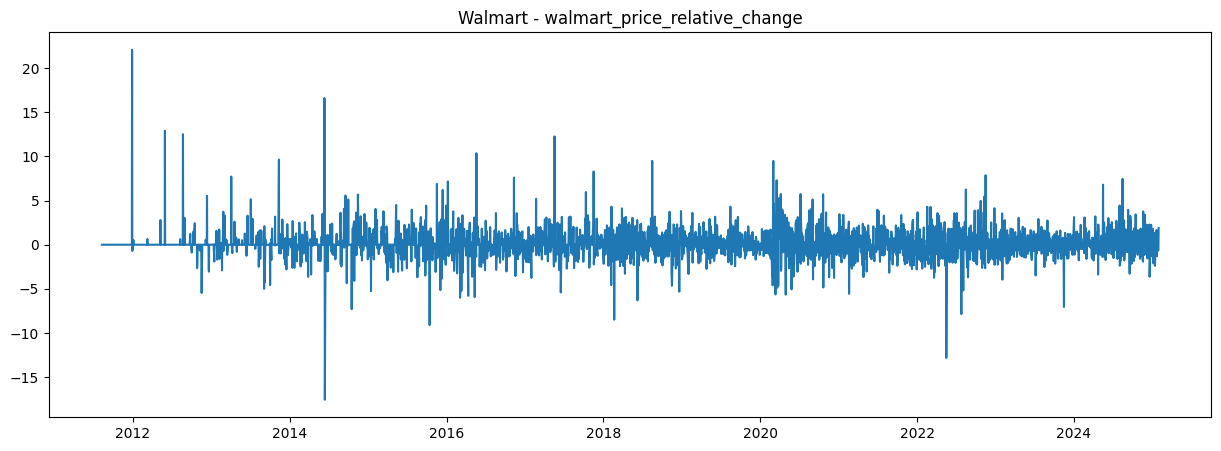

<Figure size 750x500 with 0 Axes>

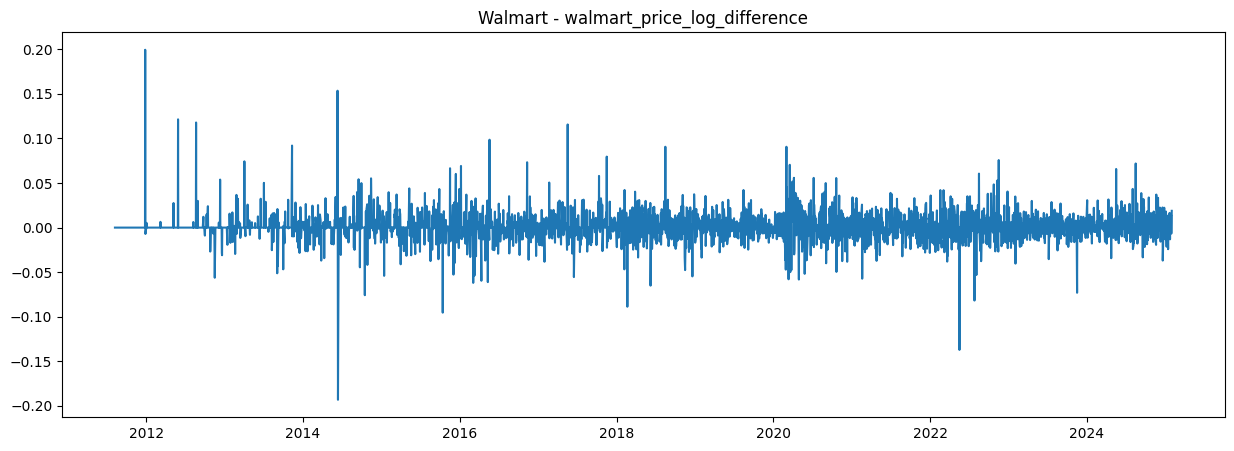

<Figure size 750x500 with 0 Axes>

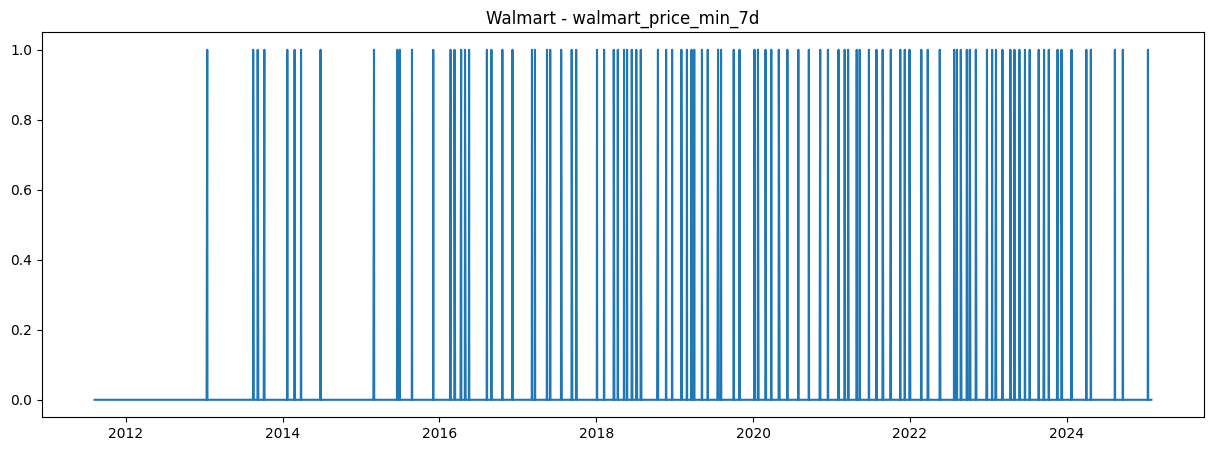

<Figure size 750x500 with 0 Axes>

<Figure size 750x500 with 0 Axes>

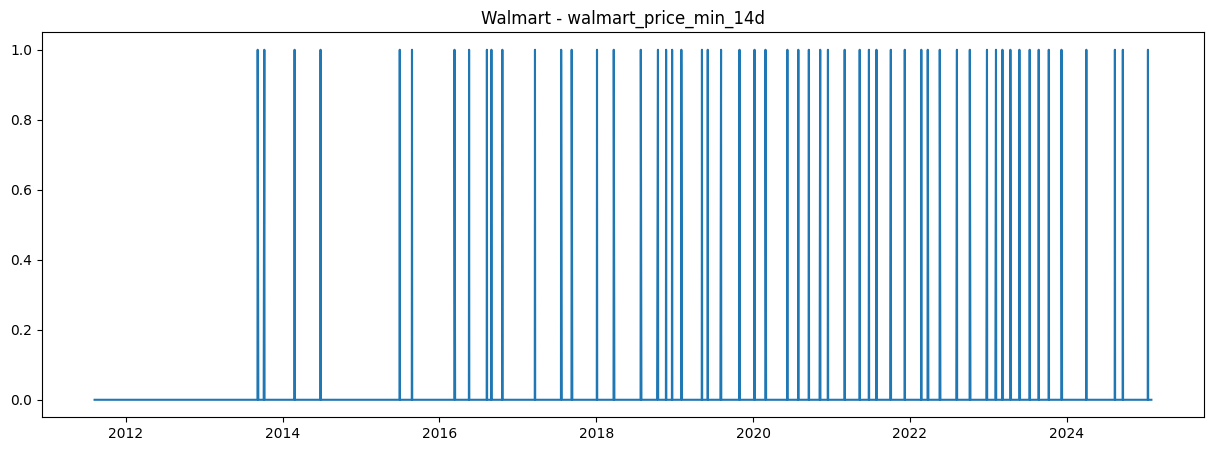

<Figure size 750x500 with 0 Axes>

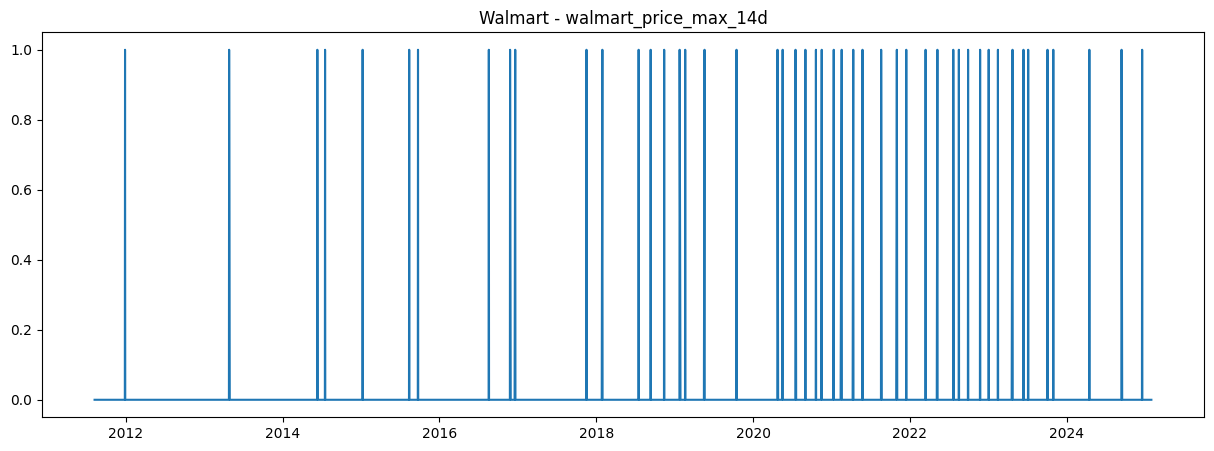

<Figure size 750x500 with 0 Axes>

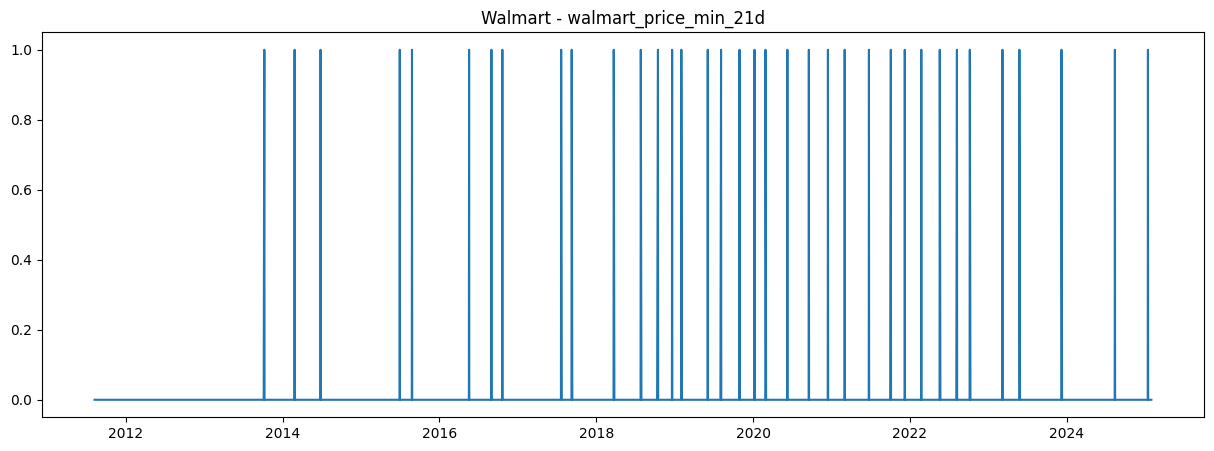

<Figure size 750x500 with 0 Axes>

<Figure size 750x500 with 0 Axes>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal._peak_finding import _boolrelextrema

# Load Walmart data
walmart_data = pd.read_parquet('/content/w_indicators.gzip')

# Create target DataFrame
walmart_targets = pd.DataFrame(index=walmart_data.index)
walmart_targets['walmart_price_absolute_change'] = np.diff(walmart_data.w_close, prepend=float('nan'))
walmart_targets['walmart_price_relative_change'] = ((walmart_data.w_close / walmart_data.w_close.shift(1)) - 1) * 100
walmart_targets['walmart_price_log_difference'] = np.diff(np.log(walmart_data.w_close), prepend=float('nan'))

# Local minima and maxima targets
data = np.array(walmart_data.w_close)
walmart_targets['walmart_price_min_7d'] = _boolrelextrema(data, np.less, order=7) * 1
walmart_targets['walmart_price_max_7d'] = _boolrelextrema(data, np.greater, order=7) * 1
walmart_targets['walmart_price_min_14d'] = _boolrelextrema(data, np.less, order=14) * 1
walmart_targets['walmart_price_max_14d'] = _boolrelextrema(data, np.greater, order=14) * 1
walmart_targets['walmart_price_min_21d'] = _boolrelextrema(data, np.less, order=21) * 1
walmart_targets['walmart_price_max_21d'] = _boolrelextrema(data, np.greater, order=21) * 1

# Plot Walmart charts
for column in walmart_targets.columns:
    plt.figure(figsize=(15, 5))
    plt.title(f'Walmart - {column}')
    plt.plot(walmart_targets.index, walmart_targets[column], label=column)
    plt.figure(figsize=(7.5, 5))


# Featured Selection

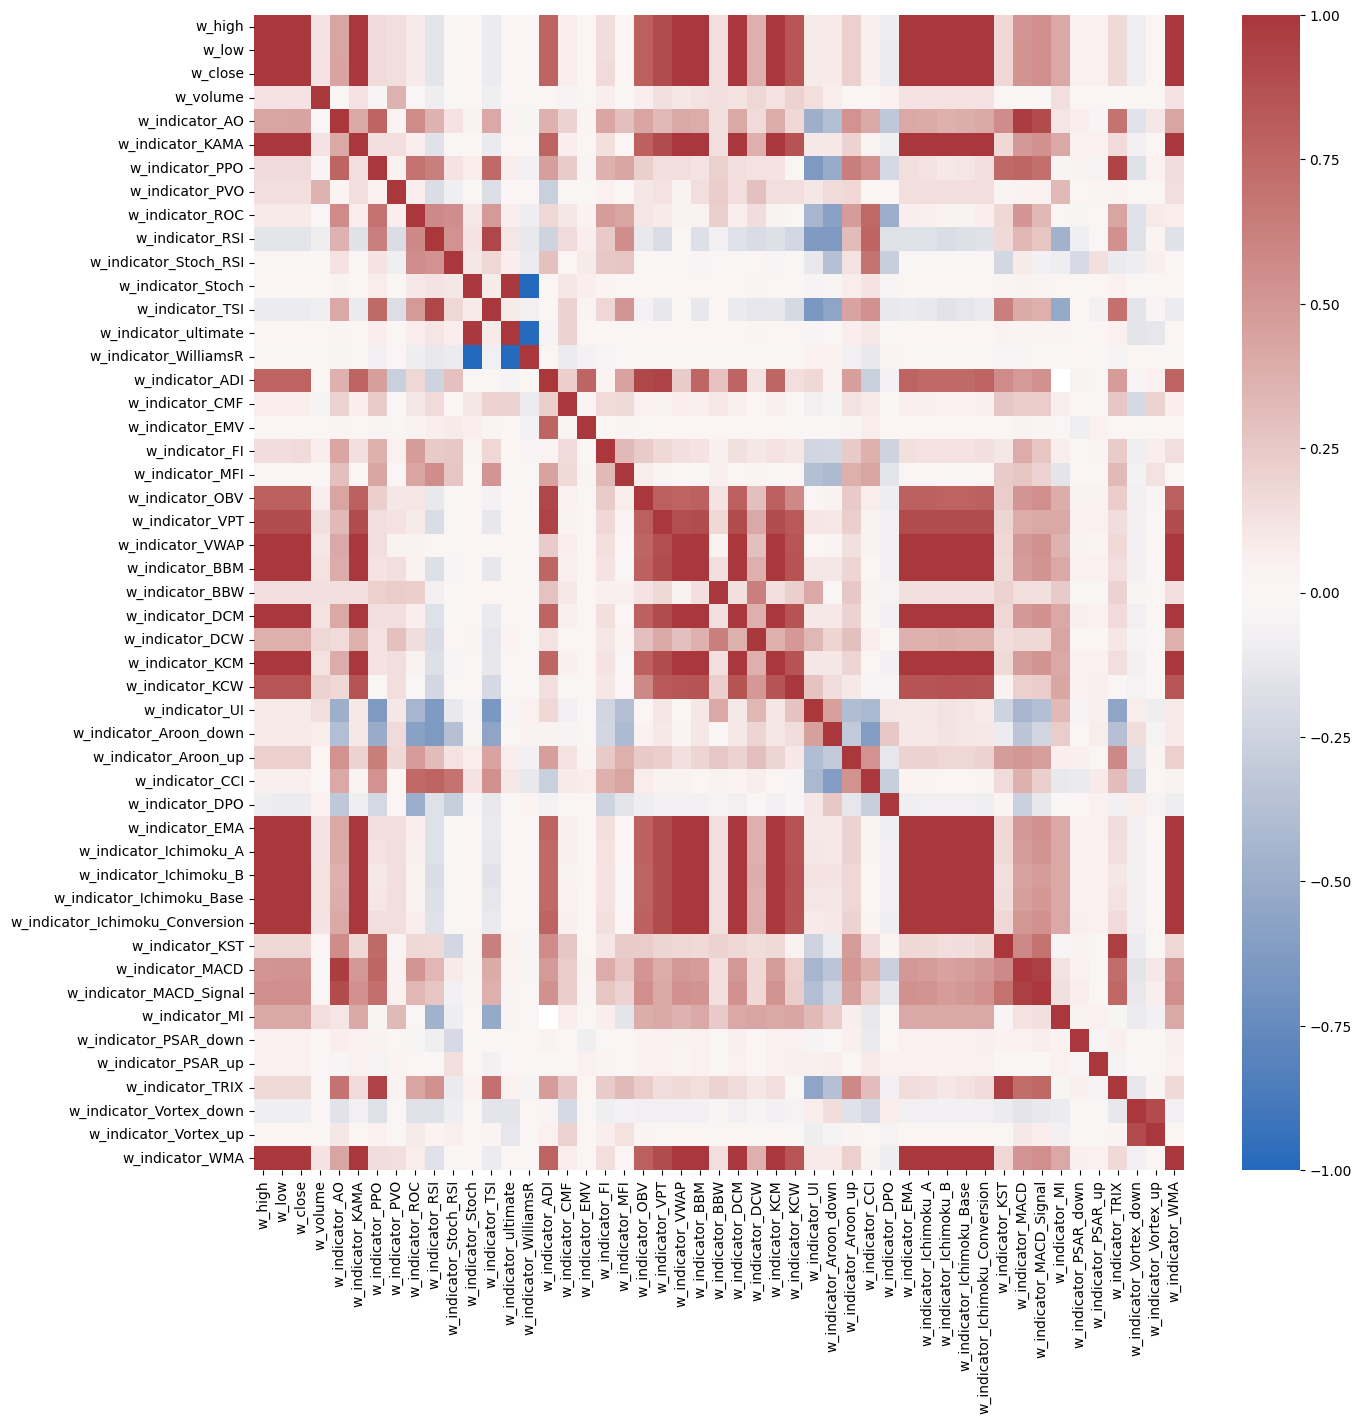

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(walmart_data.corr(), cmap='vlag')
plt.show()

In [9]:
columns_to_remove = [
    "w_indicator_KAMA", "w_indicator_ADI", "w_indicatorOBV", "w_indicator_VPT", "w_indicator_MACD","w_indicator_CR","w_indicator_RSI","w_indicator_ROC","w_indicator_TSI",
    "w_indicator_PPO","w_indicator_KST","w_indicator_UI","w_indicator_CCI",
    "w_indicator_VWAP", "w_indicator_BBM", "w_indicator_DCM", "w_indicator_KCM",
    "w_indicator_KCUW", "w_indicator_EMA", "w_indicator_Ichimoku_A","w_indicator_Aroon_down",
    "w_indicator_Ichimoku_B", "w_indicator_Ichimoku_Base",
    "w_indicator_Ichimoku_Conversion", "w_indicator_Vortex_down",
    "w_indicator_WMA", "w_indicator_Stoch", "w_indicator_WilliamsR", "w_indicator_MI"
]

walmart_data = walmart_data.drop(columns=[col for col in columns_to_remove if col in walmart_data.columns])


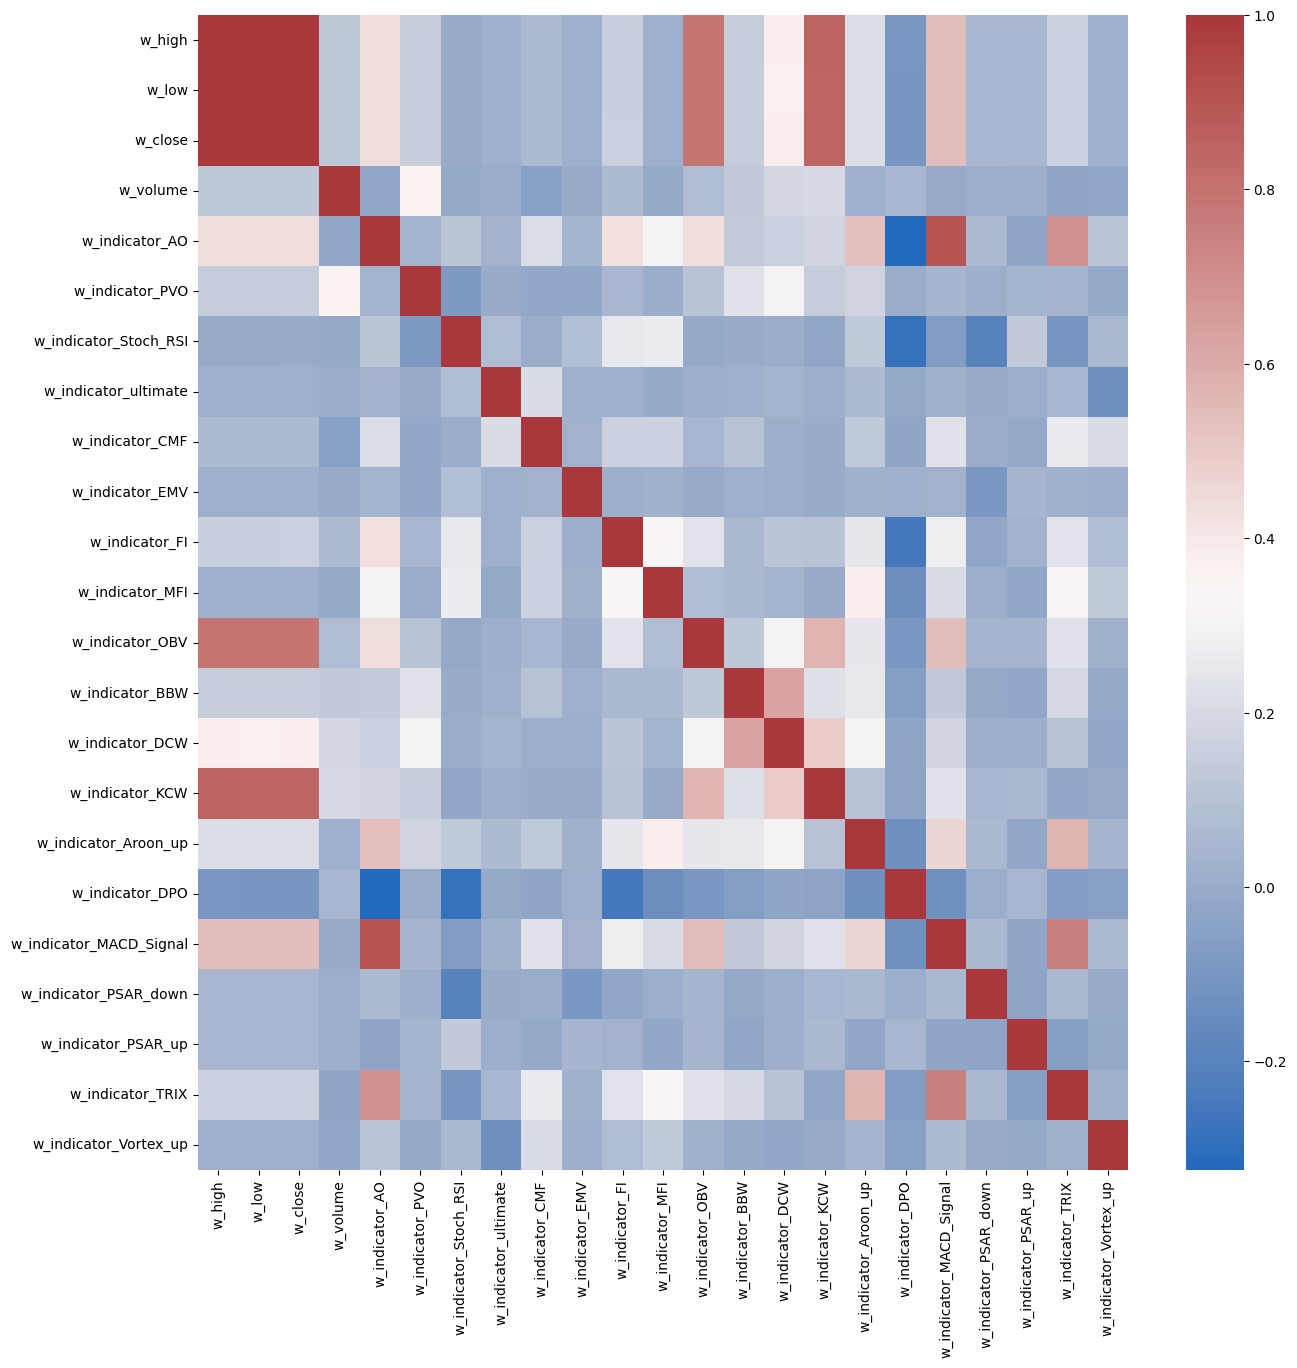

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(walmart_data.corr(), cmap='vlag')
plt.show()

In [11]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = walmart_data.copy()
df = walmart_data.dropna()
mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for target in df.columns:
    X = df.drop(columns=target)
    y = df[target]

    mi_scores = mutual_info_regression(X, y, discrete_features='auto')

    mi_matrix.loc[target, X.columns] = mi_scores

mi_matrix = mi_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mutual Information Matrix Between Variables')
plt.tight_layout()
plt.show()



Since our goal is to model w_close, we will exclude variables that merely provide additional context rather than directly contributing to its prediction.

In [12]:
columns_to_remove = [
    "w_indicator_PVO",
    "w_indicator_DPO",
    "w_indicator_PSAR_up",
    "w_indicator_PSAR_down",
    "w_indicator_Aroon_up",
    "w_indicator_ultimate",
    "w_high", "w_low",
    "w_volume",
    "w_indicator_Stoch_RSI",
    "w_indicator_EMV",
    "w_indicator_MFI",
    "w_indicator_DCW",
    "w_indicator_Vortex_up"
]

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
mi_matrix.columns = mi_matrix.columns.str.strip()
mi_matrix.index = mi_matrix.index.str.strip()

# Drop columns from the DataFrame if they exist
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

# Drop columns from the mutual information matrix if they exist
mi_matrix = mi_matrix.drop(columns=[col for col in columns_to_remove if col in mi_matrix.columns])

# Drop rows from the mutual information matrix if they exist
mi_matrix = mi_matrix.drop(index=[col for col in columns_to_remove if col in mi_matrix.index])


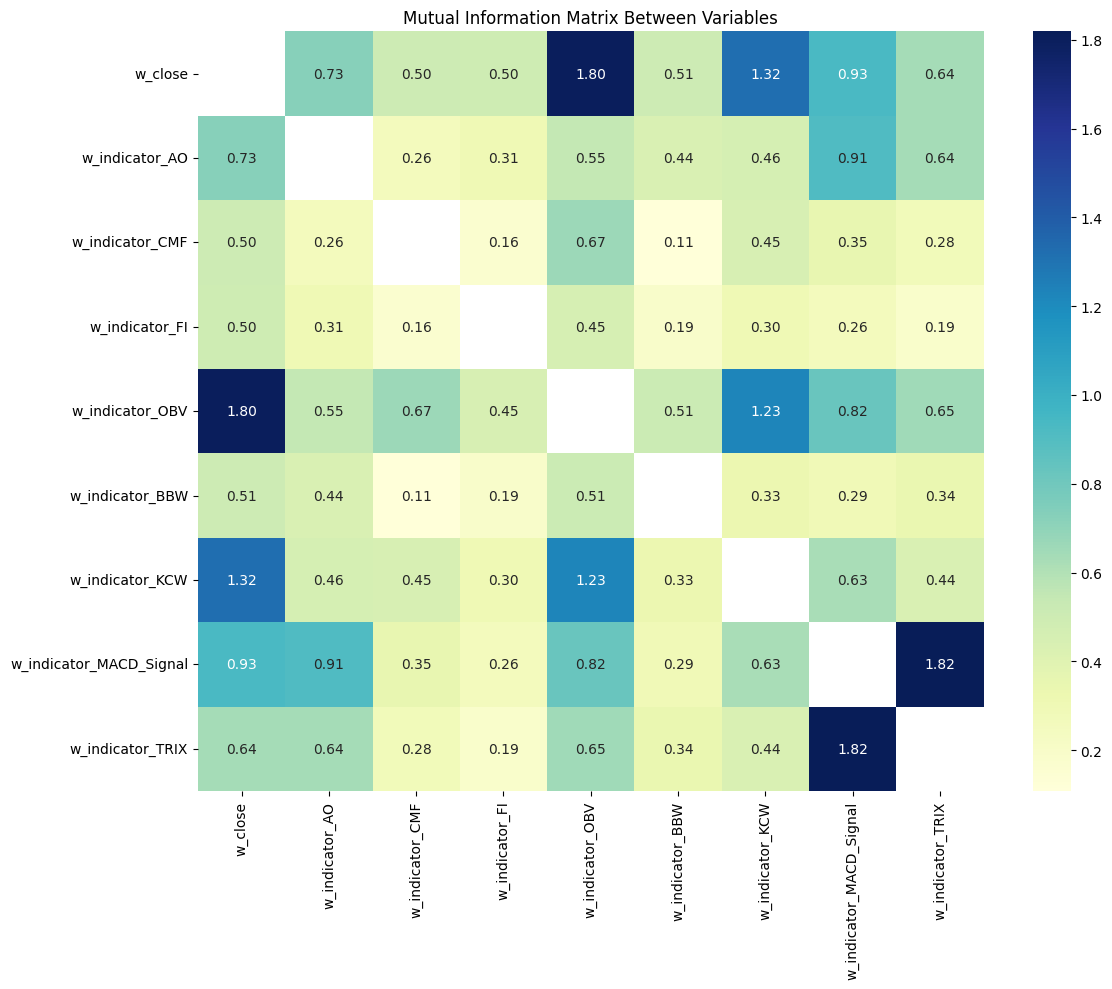

In [13]:
for target in df.columns:
    X = df.drop(columns=target)
    y = df[target]

    mi_scores = mutual_info_regression(X, y, discrete_features='auto')

    mi_matrix.loc[target, X.columns] = mi_scores

mi_matrix = mi_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mutual Information Matrix Between Variables')
plt.tight_layout()
plt.show()


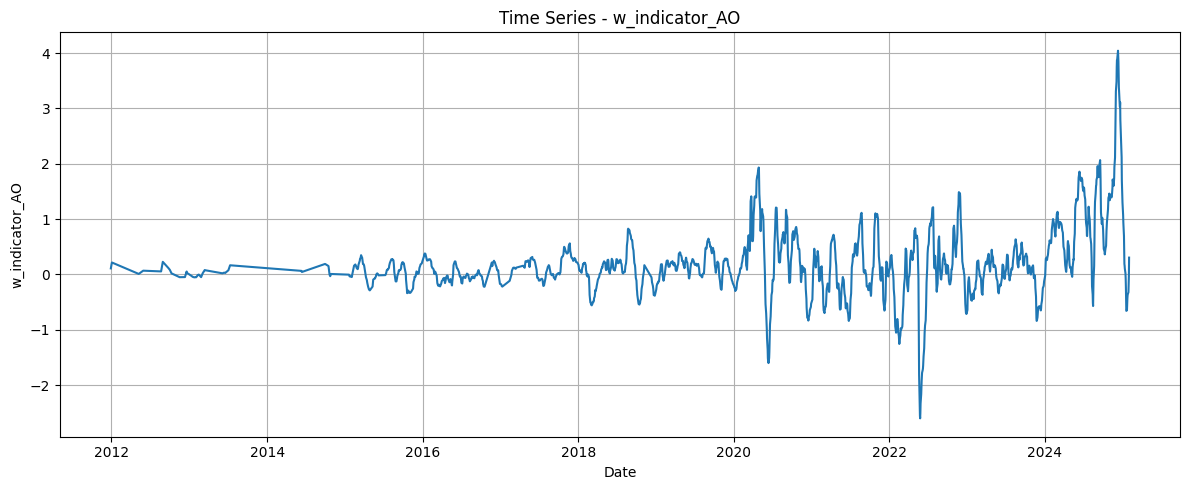

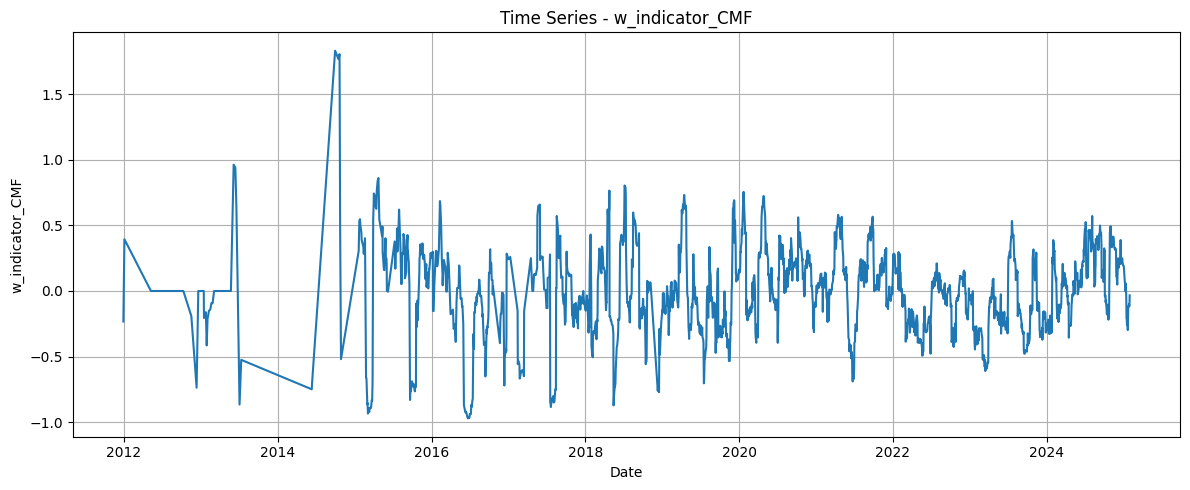

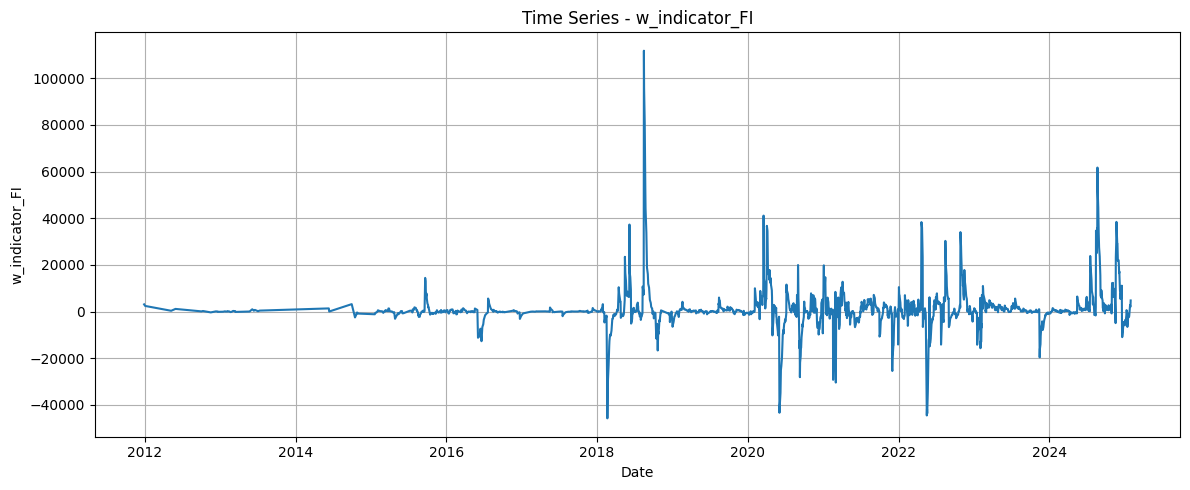

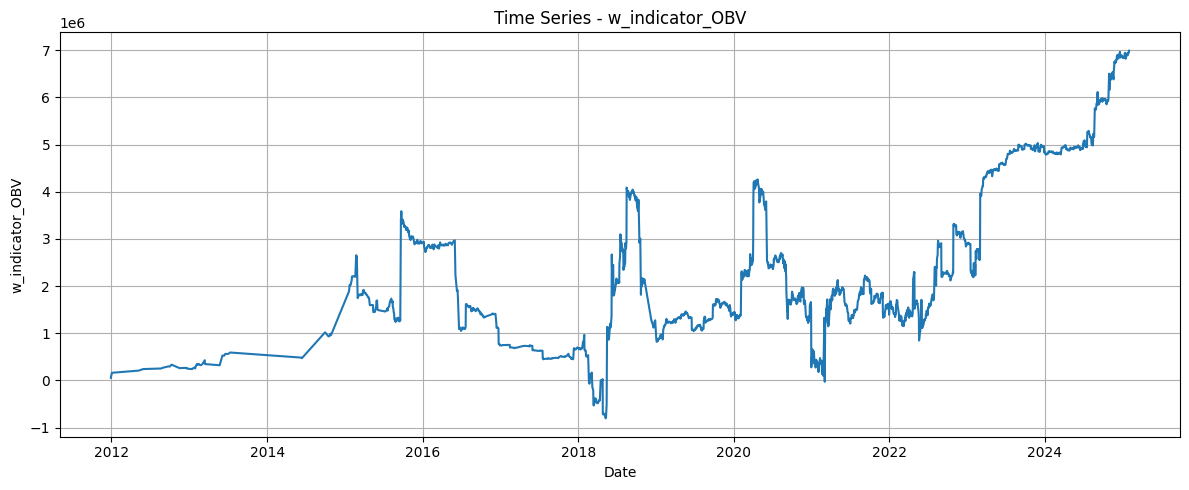

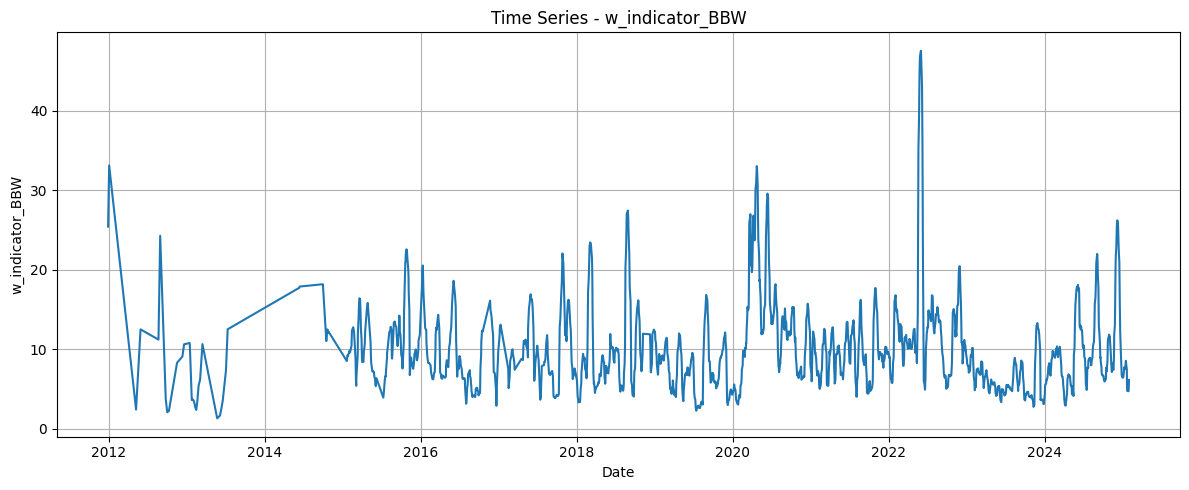

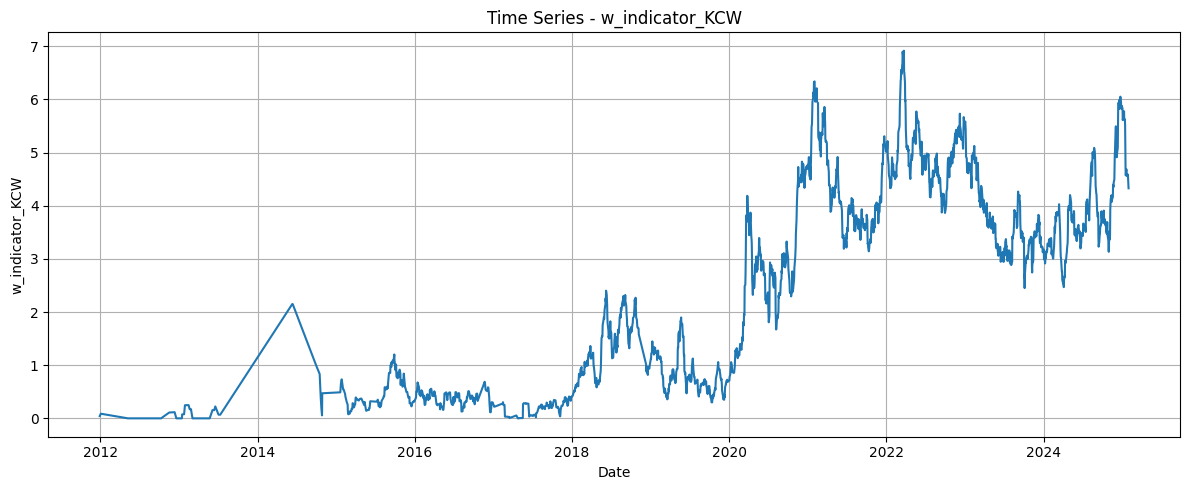

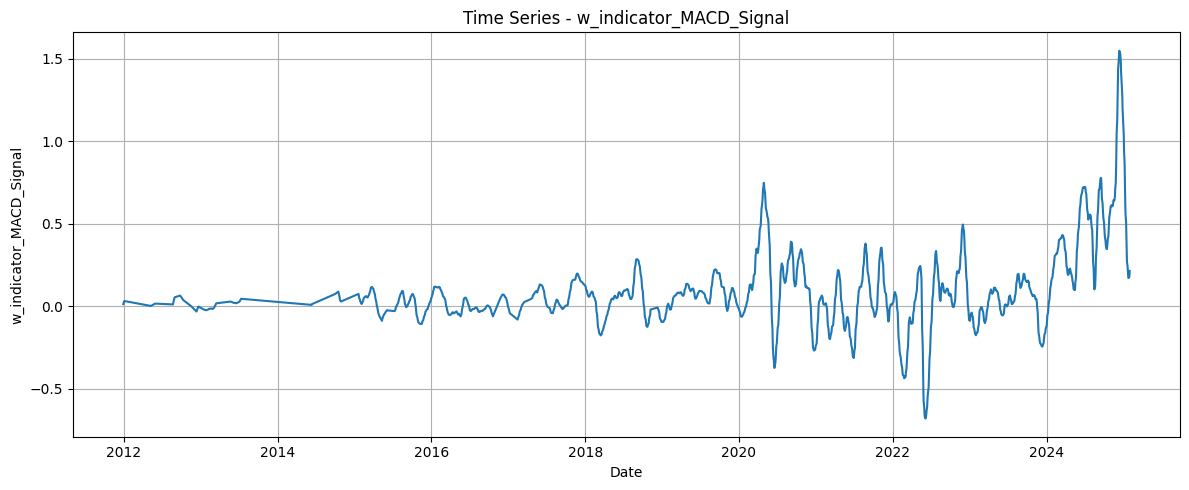

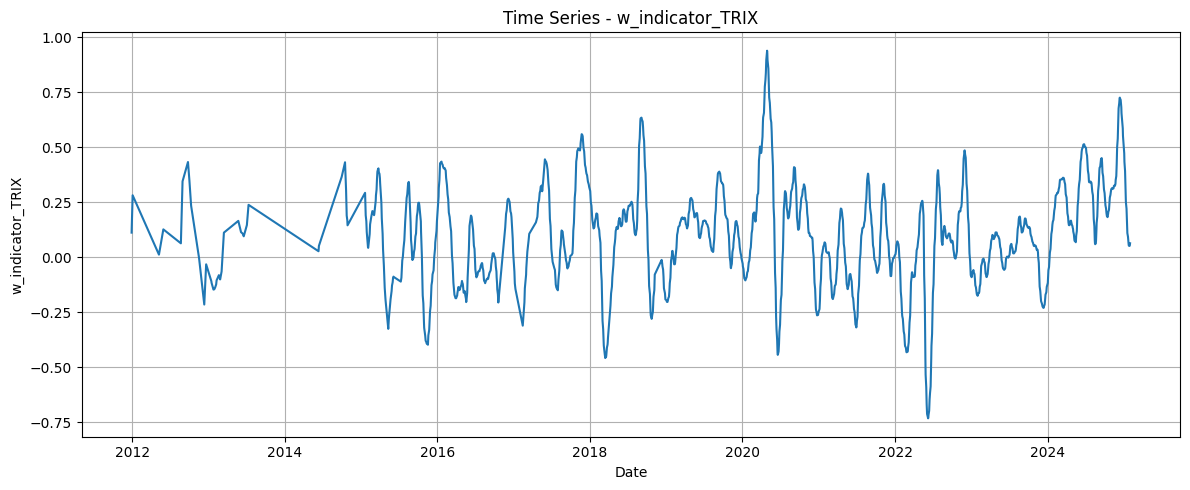

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    series = df[column]

    plt.figure(figsize=(12,5))
    plt.plot(series)
    plt.title(f"Time Series - {column}")
    plt.xlabel("Date" if df.index.name else "Index")
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



📌 Additive Model Explanation

The additive time series model assumes that a time series can be expressed as the sum of three components:

𝑦
𝑡=
𝑇
𝑡
+
𝑆
𝑡
+
𝑅
𝑡
y
t
		​


Where:

𝑇t
	​

 (Trend): the long-term progression or direction of the series (e.g., an upward trend in sales over years).

𝑆
𝑡

	​

 (Seasonality): repeating short-term patterns that occur at regular intervals (e.g., monthly spikes in sales at Christmas).

𝑅𝑡

	​

 (Residuals/Noise): the irregular component that cannot be explained by trend or seasonality.

👉 The additive model is appropriate when the magnitude of seasonal variations remains constant over time. For example, if ice cream sales always rise by about the same number of units each summer, regardless of the overall sales level.

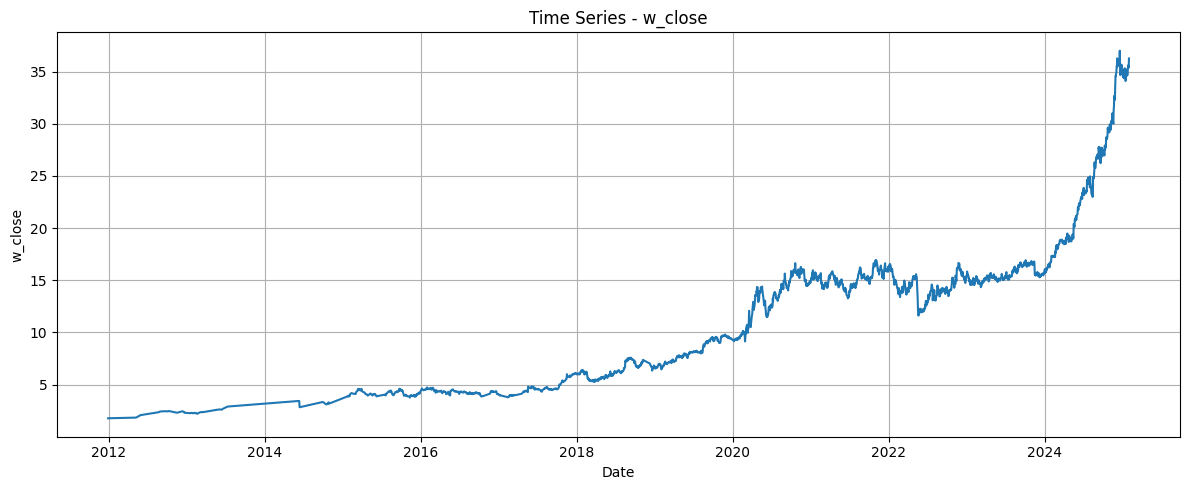

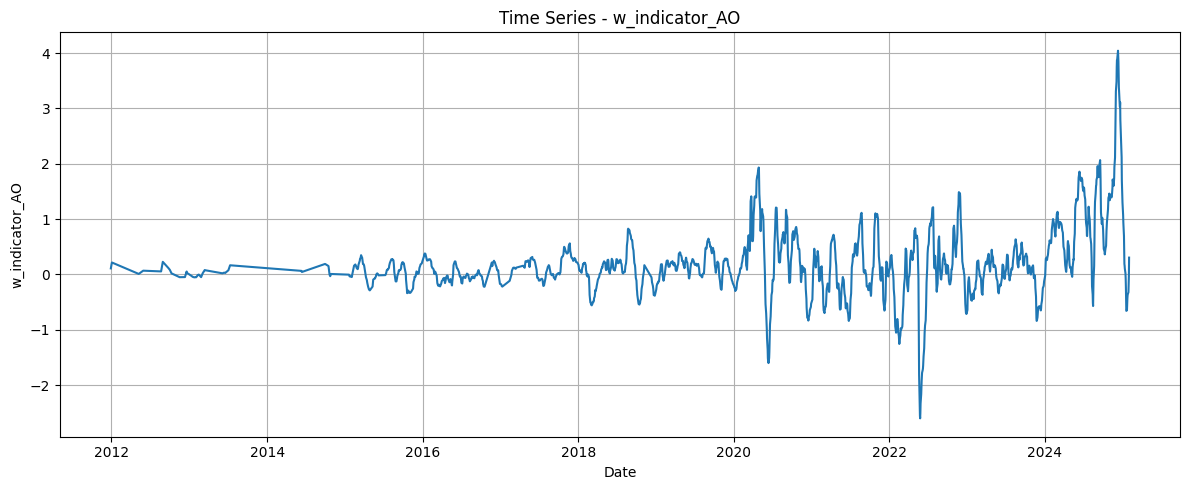

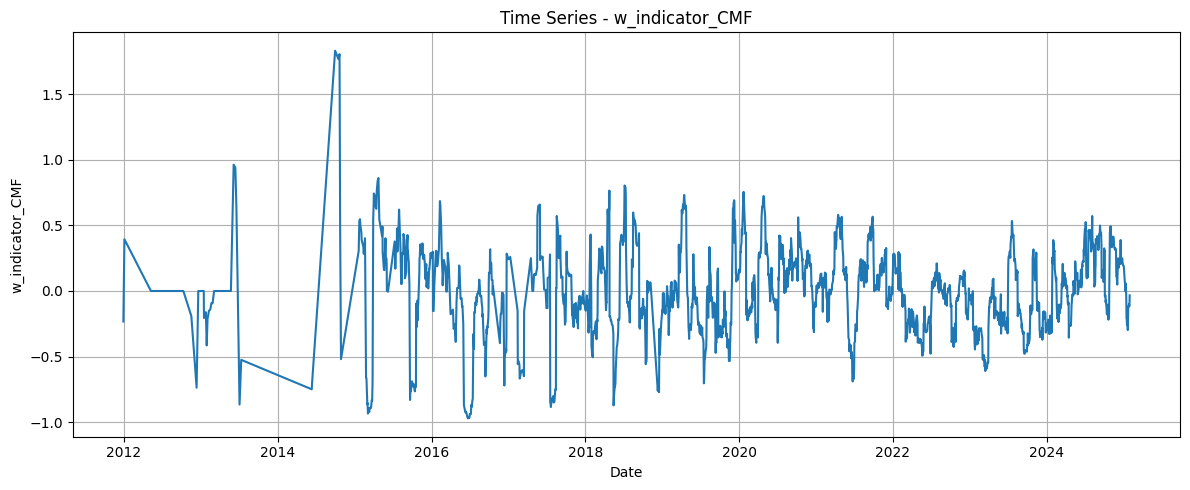

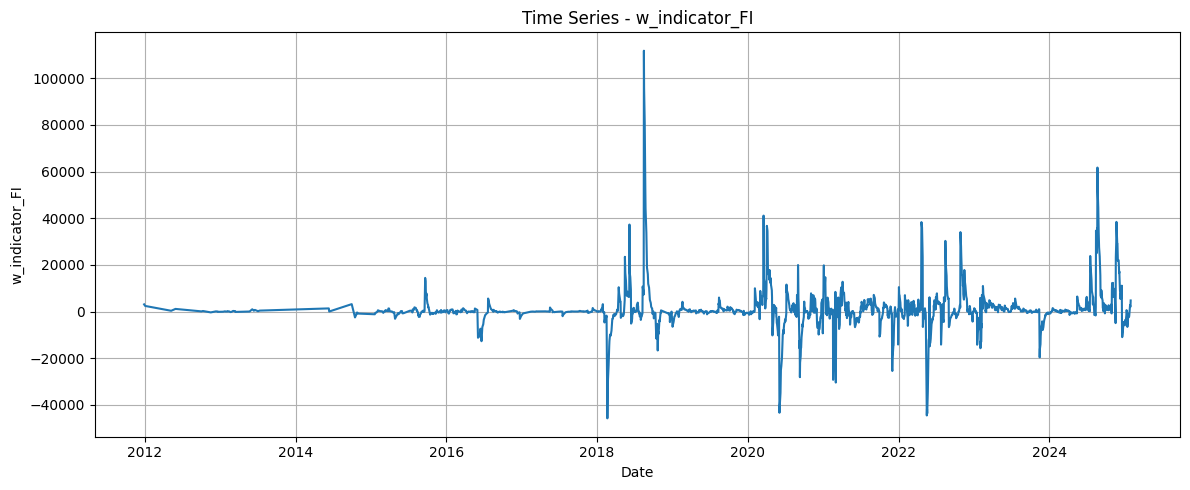

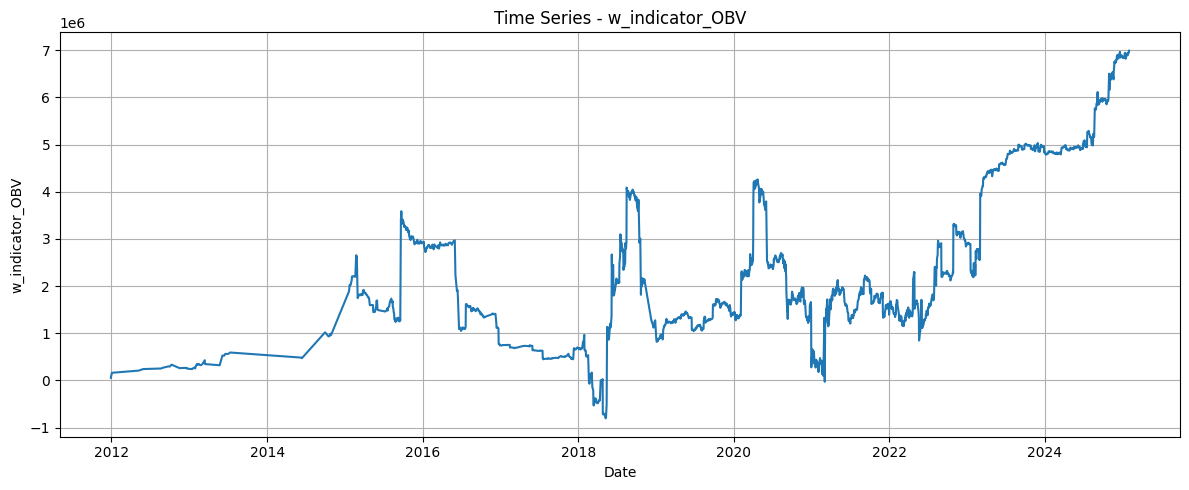

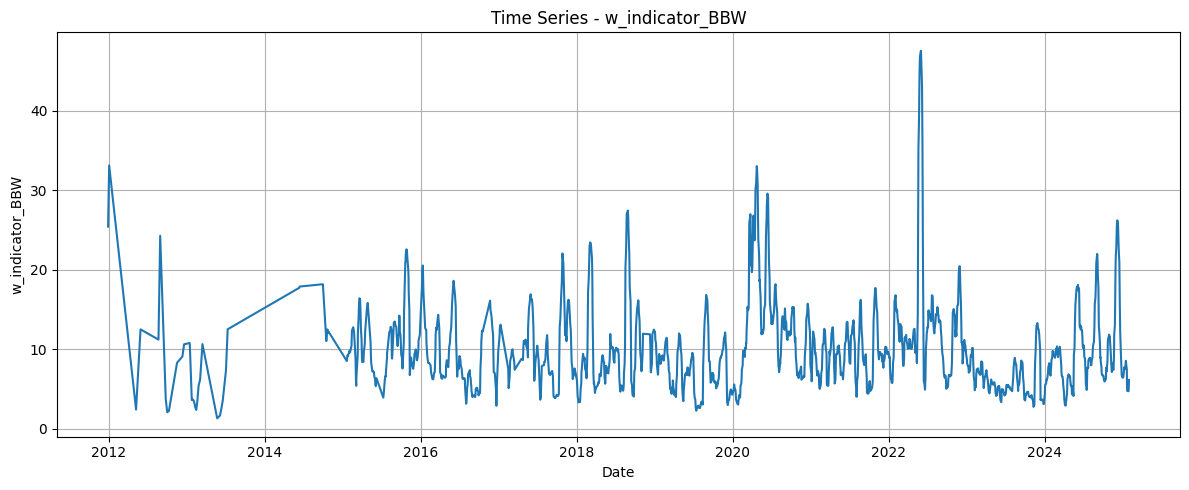

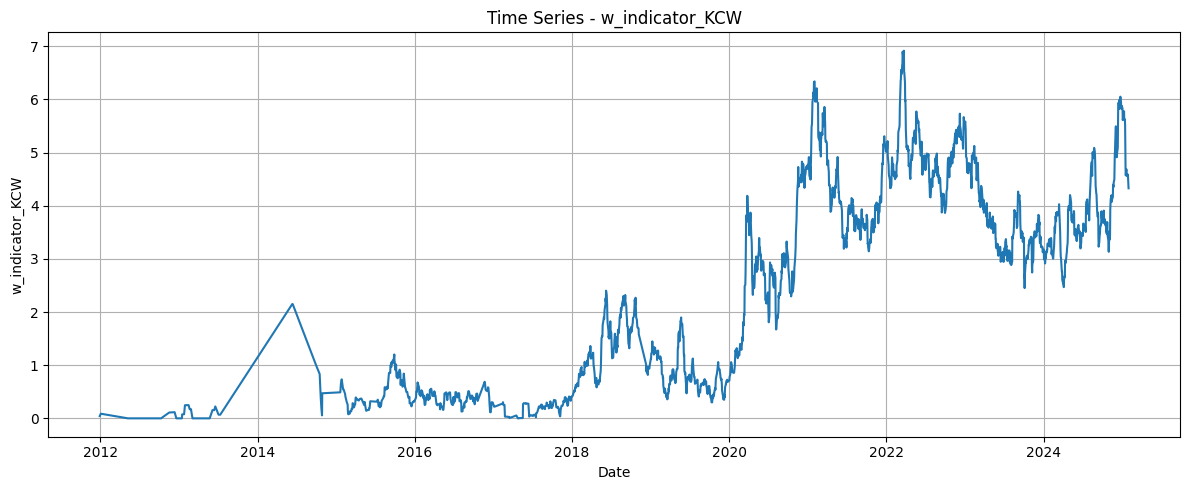

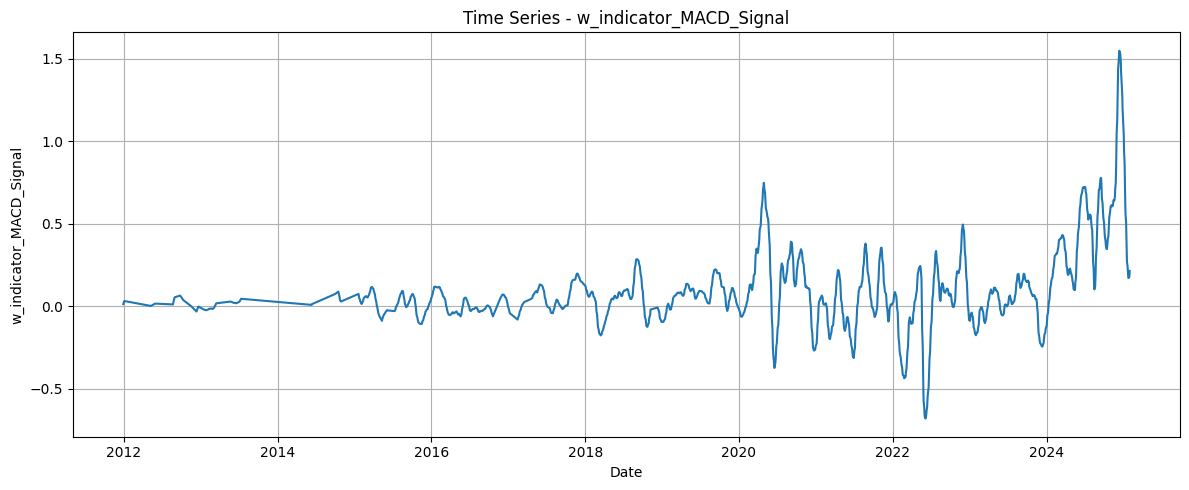

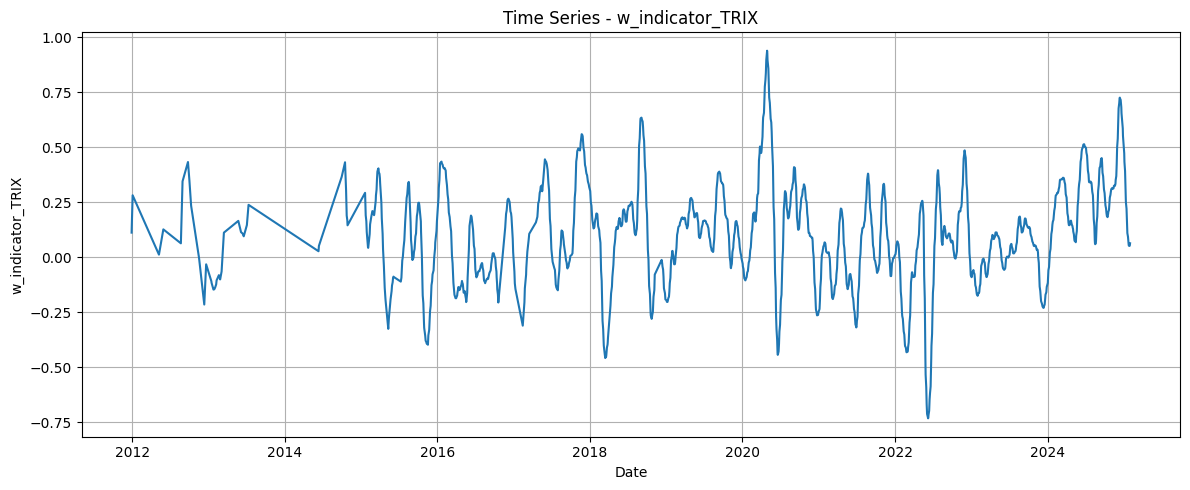

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Loop through numeric columns and plot each as a time series
for column in numeric_columns:
    series = df[column]

    plt.figure(figsize=(12,5))
    plt.plot(series)
    plt.title(f"Time Series - {column}")
    plt.xlabel("Date" if df.index.name else "Index")
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


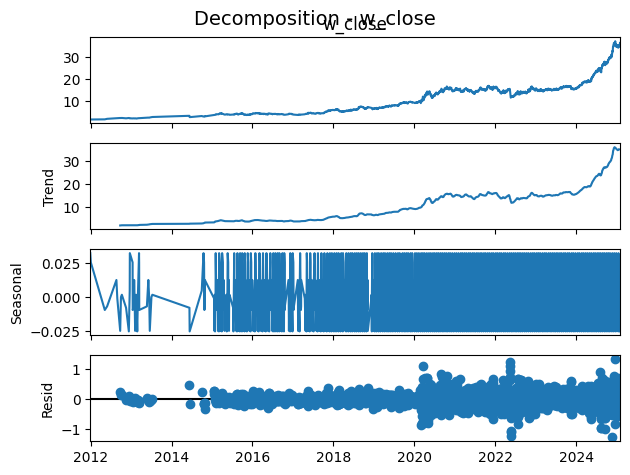

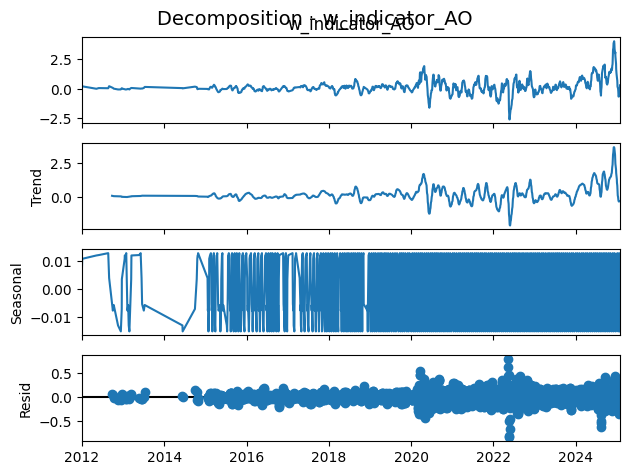

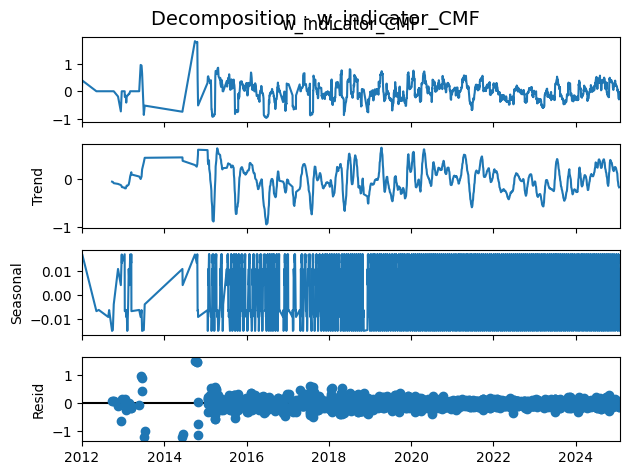

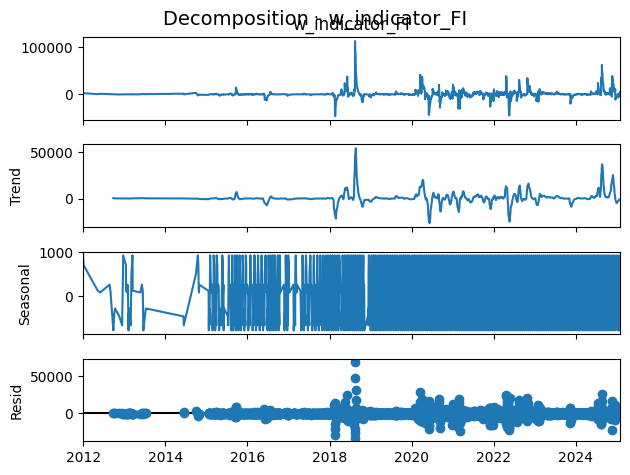

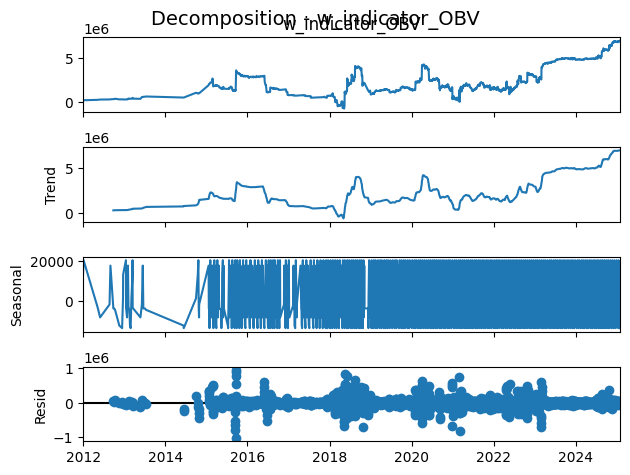

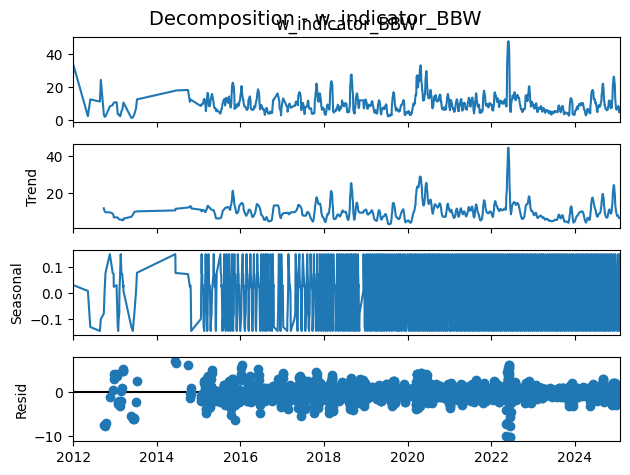

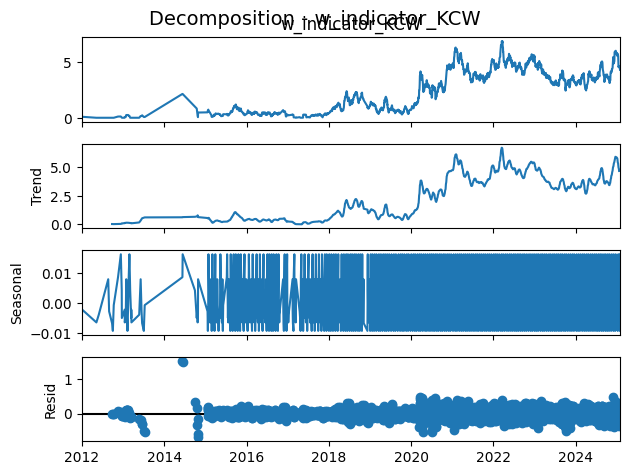

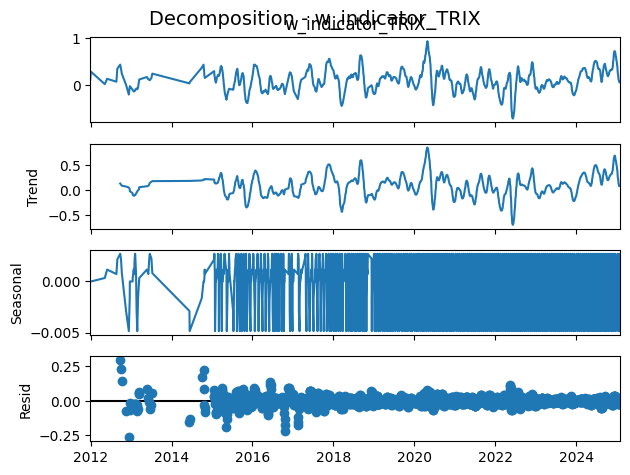

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Loop through numeric columns and perform additive decomposition
for column in numeric_columns:
    series = df[column].dropna()

    try:
        result = seasonal_decompose(series, model='additive', period=12)
        fig = result.plot()
        plt.suptitle(f"Decomposition - {column}", fontsize=14)
        plt.show()
    except Exception as e:
        print(f"⚠️ Error decomposing the series '{column}': {e}")


Most of the series do not have a clear seasonality over the period, so we will use:

* For residuals = GARCH

* For seasonality = SARIMA

In [17]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # m=12 (seasonal period)

best_aic, best_order, best_seasonal = 1e10, None, None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(serie,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            res = mod.fit(disp=False)
            if res.aic < best_aic:
                best_aic = res.aic
                best_order = param
                best_seasonal = param_seasonal
        except:
            continue

print("Best model:", best_order, best_seasonal, "AIC:", best_aic)


Best model: None None AIC: 10000000000.0


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Loop over each series
results = {}

for column in numeric_columns:
    series = df[column].dropna()
    best_aic, best_order, best_seasonal = 1e10, None, None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = SARIMAX(
                    series,
                    order=param,
                    seasonal_order=param_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                )
                res = mod.fit(disp=False)

                if res.aic < best_aic:
                    best_aic = res.aic
                    best_order = param
                    best_seasonal = param_seasonal
            except:
                continue

    results[column] = (best_order, best_seasonal, best_aic)
    print(f"✅ Column {column}: Best SARIMA model {best_order}x{best_seasonal} - AIC {best_aic:.2f}")

# If you want to save it in a nice DataFrame:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['order', 'seasonal_order', 'AIC'])
print("\n📊 Final results:")
print(results_df)


✅ Column w_close: Best SARIMA model (1, 0, 0)x(0, 0, 0, 12) - AIC -252.97
✅ Column w_indicator_AO: Best SARIMA model (1, 1, 1)x(1, 0, 0, 12) - AIC -6399.06
✅ Column w_indicator_CMF: Best SARIMA model (1, 0, 1)x(1, 0, 1, 12) - AIC -2566.56
✅ Column w_indicator_FI: Best SARIMA model (0, 1, 1)x(0, 1, 1, 12) - AIC 41748.53
✅ Column w_indicator_OBV: Best SARIMA model (0, 1, 0)x(1, 1, 1, 12) - AIC 56166.38
✅ Column w_indicator_BBW: Best SARIMA model (1, 1, 1)x(1, 0, 1, 12) - AIC 5803.06
✅ Column w_indicator_KCW: Best SARIMA model (1, 1, 0)x(1, 0, 1, 12) - AIC -2708.52
✅ Column w_indicator_MACD_Signal: Best SARIMA model (1, 1, 0)x(0, 0, 1, 12) - AIC -14903.52
✅ Column w_indicator_TRIX: Best SARIMA model (1, 1, 1)x(1, 0, 1, 12) - AIC -10815.93

📊 Final results:
                             order seasonal_order           AIC
w_close                  (1, 0, 0)  (0, 0, 0, 12)   -252.967704
w_indicator_AO           (1, 1, 1)  (1, 0, 0, 12)  -6399.058844
w_indicator_CMF          (1, 0, 1)  (1, 0, 1

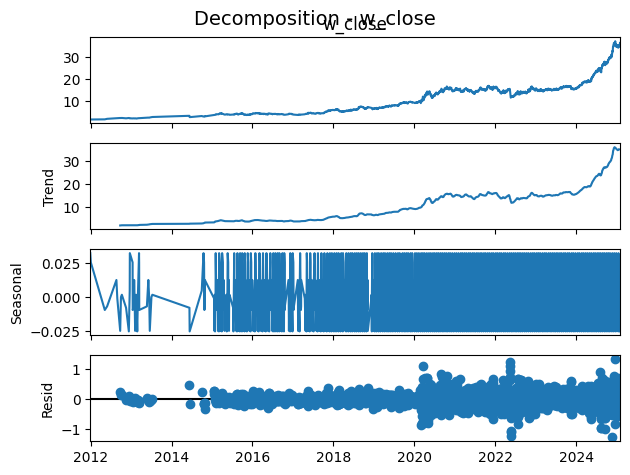

⚠️ Error fitting SARIMA for series 'w_close': name 'resultados_df' is not defined


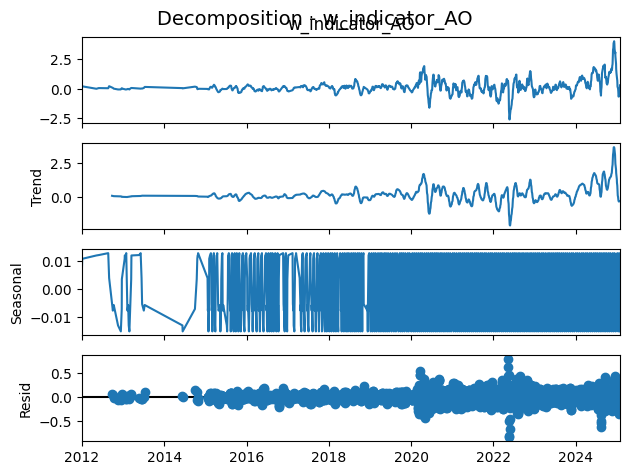

⚠️ Error fitting SARIMA for series 'w_indicator_AO': name 'resultados_df' is not defined


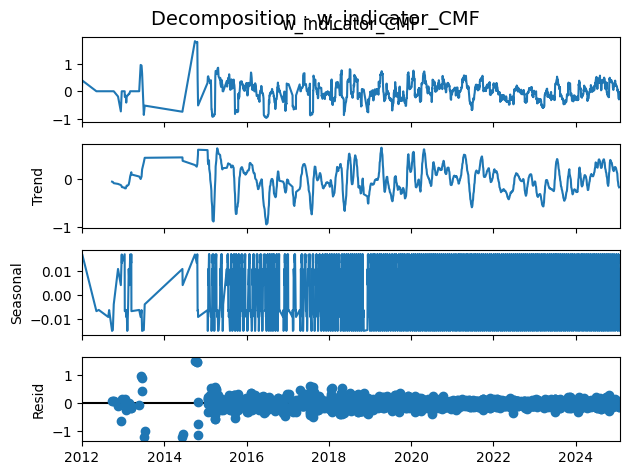

⚠️ Error fitting SARIMA for series 'w_indicator_CMF': name 'resultados_df' is not defined


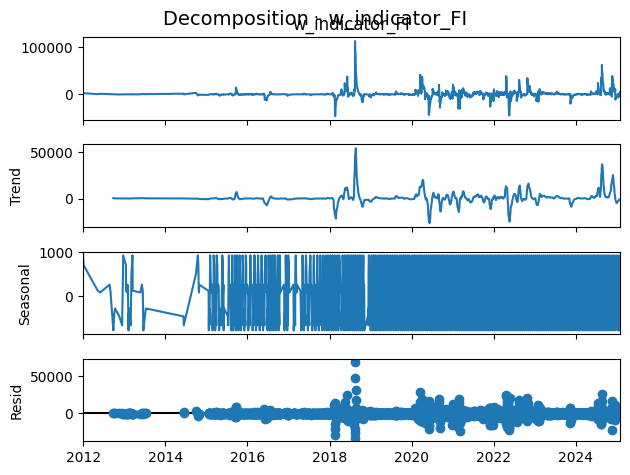

⚠️ Error fitting SARIMA for series 'w_indicator_FI': name 'resultados_df' is not defined


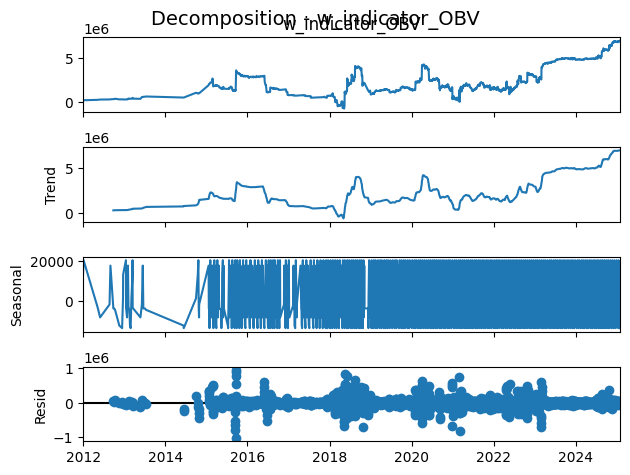

⚠️ Error fitting SARIMA for series 'w_indicator_OBV': name 'resultados_df' is not defined


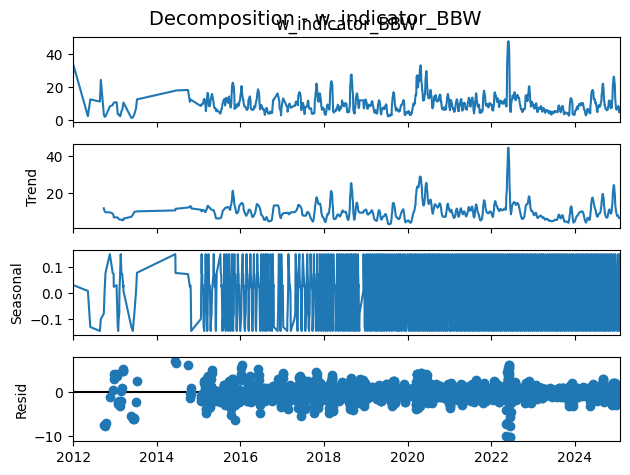

⚠️ Error fitting SARIMA for series 'w_indicator_BBW': name 'resultados_df' is not defined


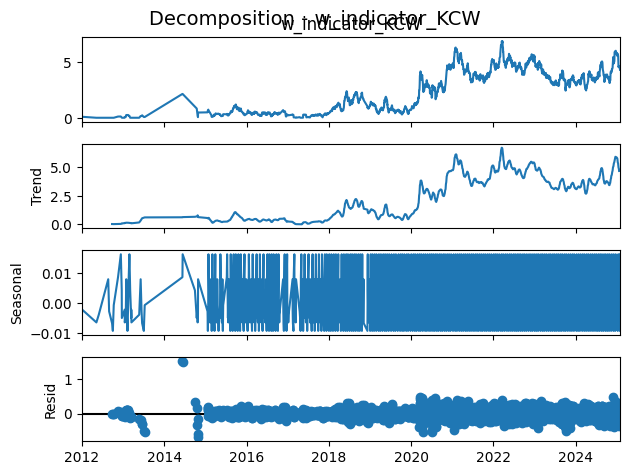

⚠️ Error fitting SARIMA for series 'w_indicator_KCW': name 'resultados_df' is not defined


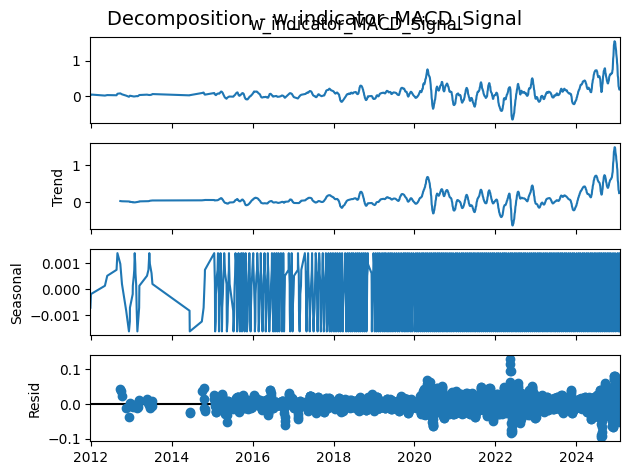

⚠️ Error fitting SARIMA for series 'w_indicator_MACD_Signal': name 'resultados_df' is not defined


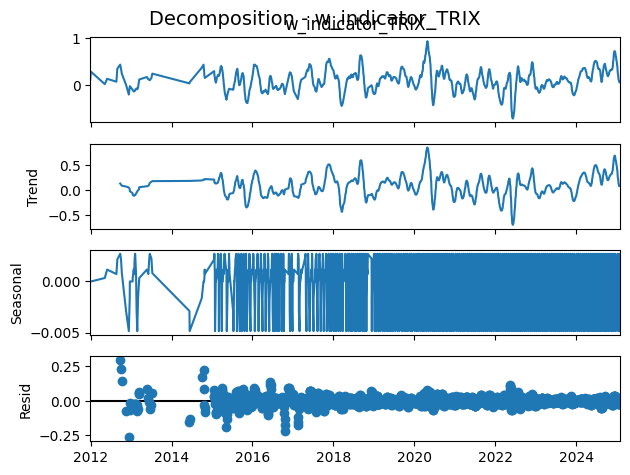

⚠️ Error fitting SARIMA for series 'w_indicator_TRIX': name 'resultados_df' is not defined


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# resultados_df é o DataFrame que contém os melhores parâmetros SARIMA calculados antes
# Colunas: 'order', 'seasonal_order', 'AIC'

for column in numeric_columns:
    series = df[column].dropna()

    # Decomposição clássica
    try:
        result = seasonal_decompose(series, model='additive', period=12)
        fig = result.plot()
        plt.suptitle(f"Decomposition - {column}", fontsize=14)
        plt.show()
    except Exception as e:
        print(f"⚠️ Error decomposing the series '{column}': {e}")

    # Ajuste SARIMA usando os melhores parâmetros do cálculo anterior
    try:
        best_order = resultados_df.loc[column, 'order']
        best_seasonal = resultados_df.loc[column, 'seasonal_order']

        model = SARIMAX(series,
                        order=best_order,
                        seasonal_order=best_seasonal,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        res = model.fit(disp=False)
        print(f"\n📊 SARIMA Summary - {column}")
        print(res.summary())

        # Predição in-sample para obter resíduos
        fitted_vals = res.fittedvalues
        residuals = series - fitted_vals

        # Plot residuals
        plt.figure(figsize=(10,4))
        plt.plot(residuals, label="Residuals")
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"SARIMA Residuals - {column}")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error fitting SARIMA for series '{column}': {e}")


Diagnostic Statistics
|Statistic|	Value|	Interpretation|

|-----------------------------------|
|Ljung-Box (Q)|	20.66|	Residuals are not purely white noise (Prob(Q)=0)|
|Jarque-Bera (JB)|	147682.44|	Residuals are not normally distributed (Prob(JB)=0)|
|Heteroskedasticity (H)|	0.07|	Residual variance changes over time (Prob(H)=0)|
|Skew|	1.80	|Residuals are right-skewed
Kurtosis	44.22	Very heavy-tailed residuals (leptokurtic)
✅ Interpretation

The SARIMAX(1,1,1)x(1,1,1,12) model fits the w_indicator_TRIX series capturing:

Trend (through differencing d=1)

Seasonality (12-period season)

Autocorrelation (AR/MA components)

Residuals indicate:

Non-normal distribution → may need robust methods

Heteroskedasticity → volatility is time-dependent

In [20]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 12.4 MB/s eta 0:00:00


📊 SARIMA vs SARIMA+GARCH Comparison: w_close
SARIMA -> R²: 0.9989
SARIMA+GARCH -> R²: 0.9994


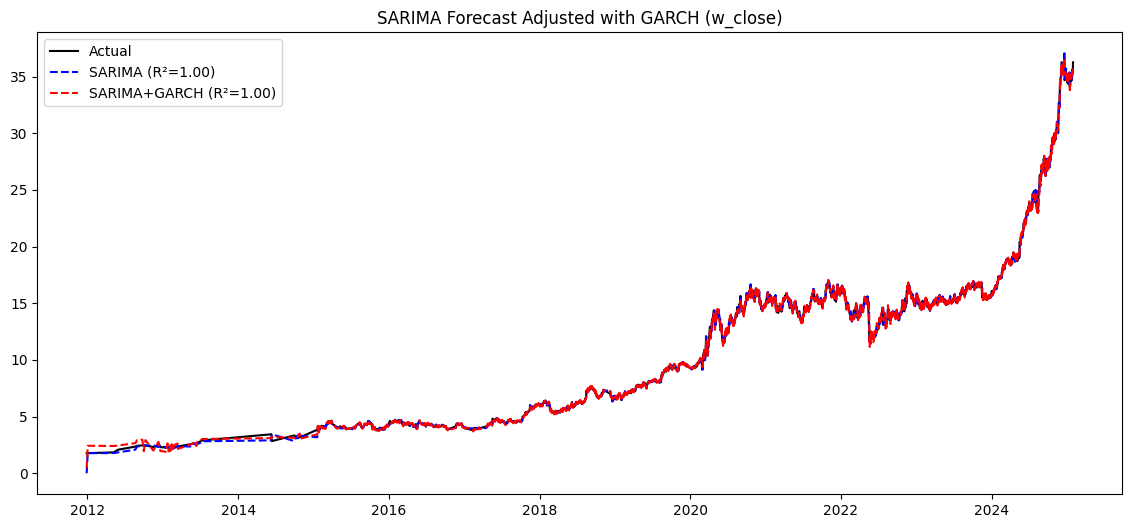

📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_AO
SARIMA -> R²: 0.9925
SARIMA+GARCH -> R²: 0.9956


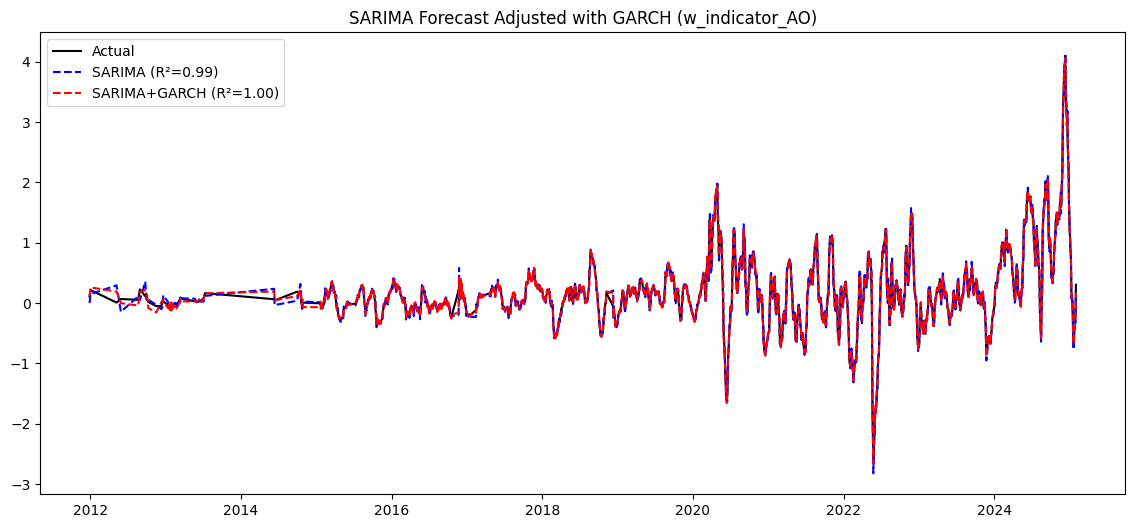

📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_CMF
SARIMA -> R²: 0.8228
SARIMA+GARCH -> R²: 0.8519


📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_FI
SARIMA -> R²: 0.7294
SARIMA+GARCH -> R²: 0.6472


📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_OBV
SARIMA -> R²: 0.9938
SARIMA+GARCH -> R²: 0.9914


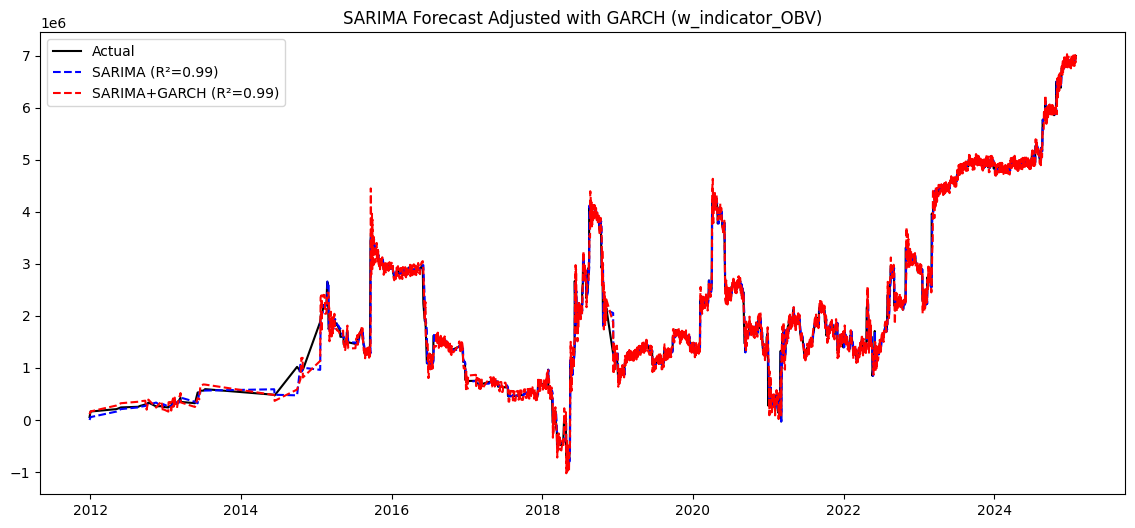

📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_BBW
SARIMA -> R²: 0.9215
SARIMA+GARCH -> R²: 0.9468


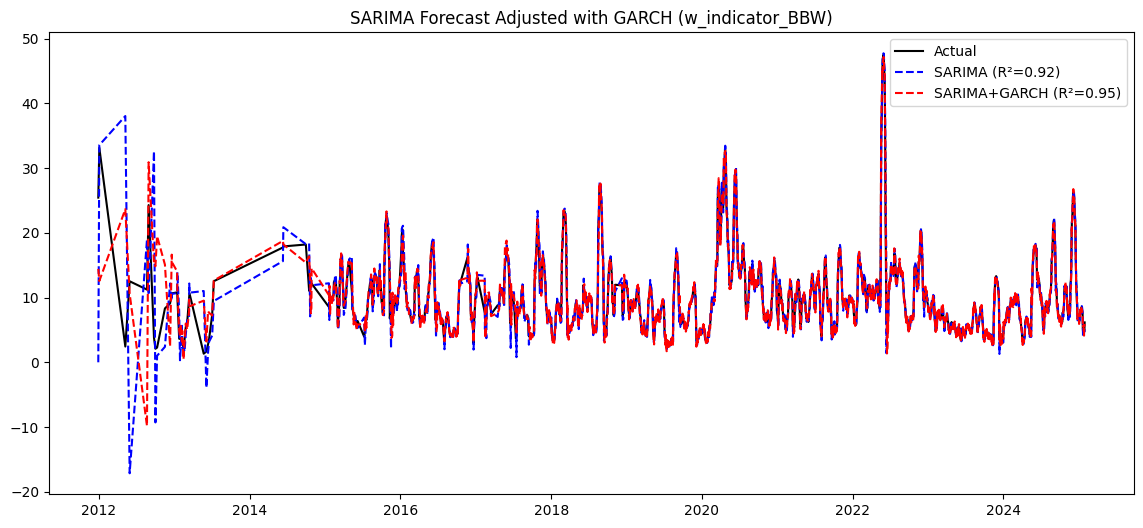

📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_KCW
SARIMA -> R²: 0.9949
SARIMA+GARCH -> R²: 0.9966


📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_MACD_Signal
SARIMA -> R²: 0.9990
SARIMA+GARCH -> R²: 0.9993


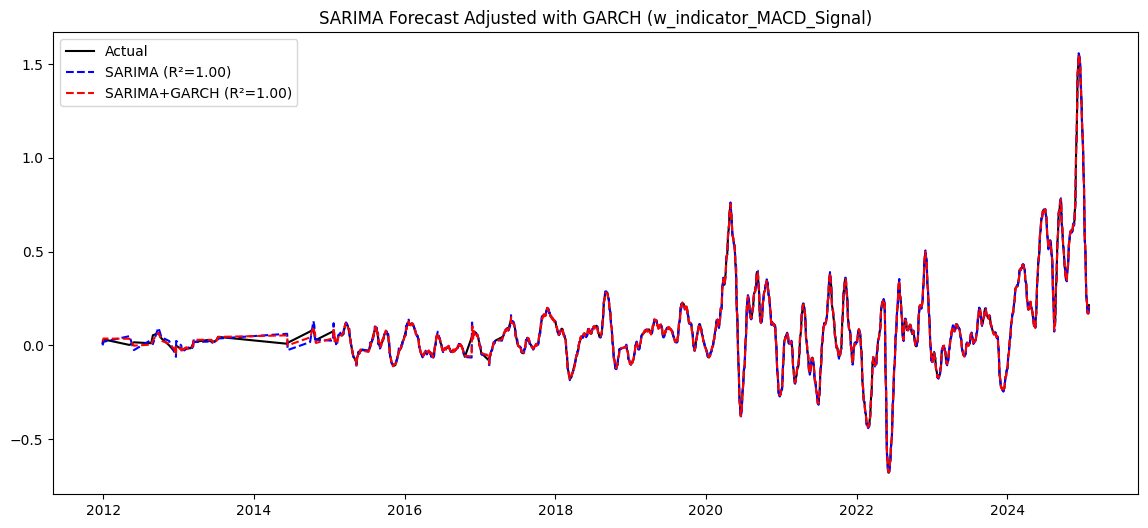

📊 SARIMA vs SARIMA+GARCH Comparison: w_indicator_TRIX
SARIMA -> R²: 0.9857
SARIMA+GARCH -> R²: 0.9367


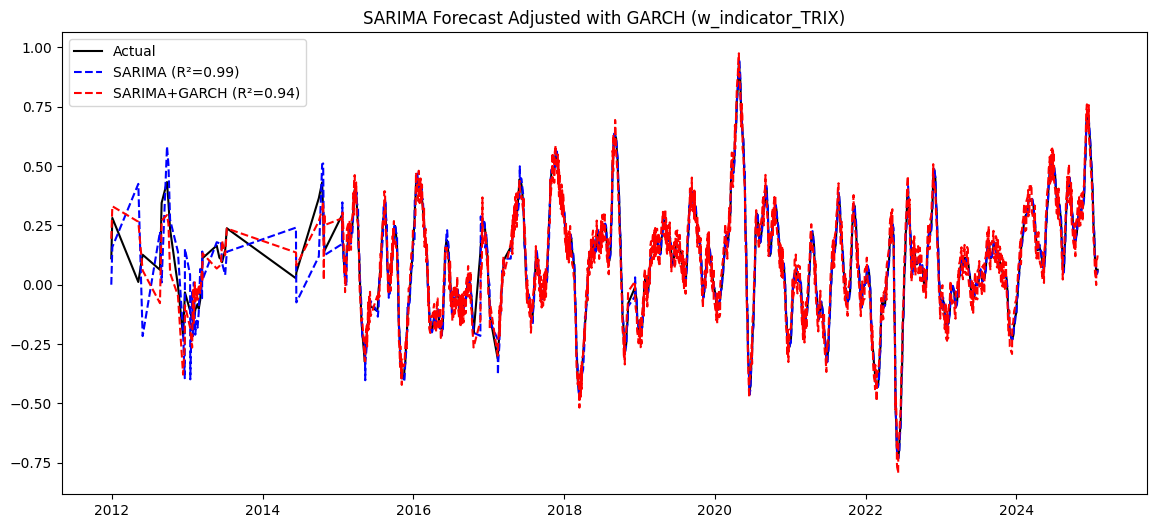

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from sklearn.metrics import r2_score

# Use the results from the grid search
for column in numeric_columns:
    series = df[column].dropna()
    y = series.copy()

    # Get the best parameters from the grid search
    order = results_df.loc[column, "order"]
    seasonal_order = results_df.loc[column, "seasonal_order"]

    # ===== 1. SARIMA with best parameters =====
    sarima = SARIMAX(y, order=order, seasonal_order=seasonal_order,
                     enforce_stationarity=False, enforce_invertibility=False)
    res_sarima = sarima.fit(disp=False)
    y_pred_sarima = res_sarima.fittedvalues

    # ===== 2. Residuals =====
    resid_sarima = y - y_pred_sarima

    # ===== 3. GARCH =====
    garch = arch_model(resid_sarima.dropna(), vol='Garch', p=1, q=1)
    res_garch = garch.fit(disp="off")
    garch_pred = res_garch.conditional_volatility

    # ===== 4. Adjusted SARIMA + GARCH =====
    sarima_garch_adjusted = y_pred_sarima.copy()
    indices = resid_sarima.dropna().index
    sarima_garch_adjusted[indices] += np.sign(resid_sarima[indices]) * garch_pred.values

    # ===== 5. Evaluation =====
    r2_sarima = r2_score(y[1:], y_pred_sarima[1:])
    r2_adjusted = r2_score(y[1:], sarima_garch_adjusted[1:])

    print(f"📊 SARIMA vs SARIMA+GARCH Comparison: {column}")
    print(f"SARIMA -> R²: {r2_sarima:.4f}")
    print(f"SARIMA+GARCH -> R²: {r2_adjusted:.4f}")

    # ===== 6. Plot =====
    plt.figure(figsize=(14,6))
    plt.plot(y, label="Actual", color="black")
    plt.plot(y_pred_sarima, label=f"SARIMA (R²={r2_sarima:.2f})", linestyle="--", color="blue")
    plt.plot(sarima_garch_adjusted, label=f"SARIMA+GARCH (R²={r2_adjusted:.2f})", linestyle="--", color="red")
    plt.title(f"SARIMA Forecast Adjusted with GARCH ({column})")
    plt.legend()
    plt.show()


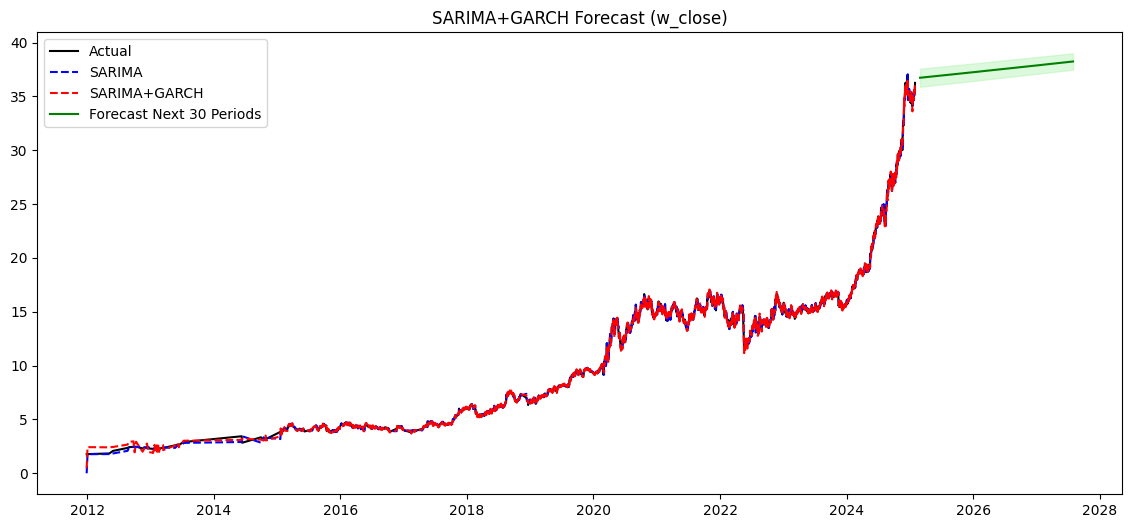

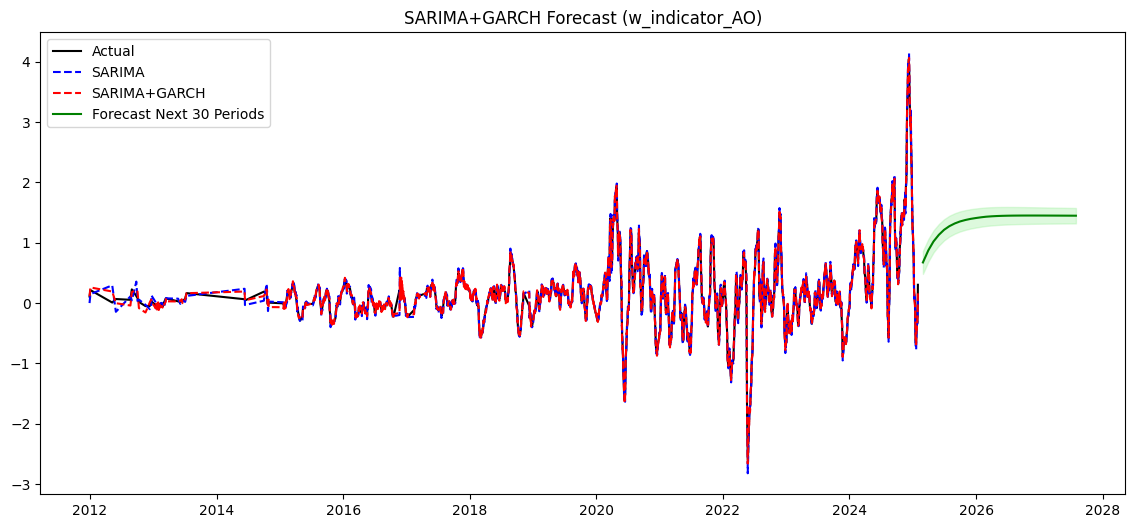

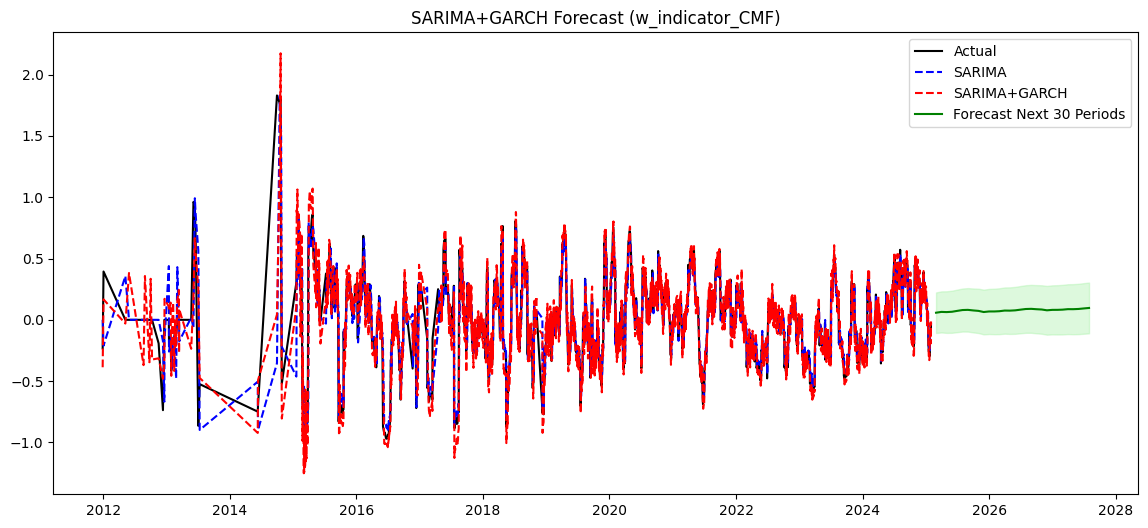

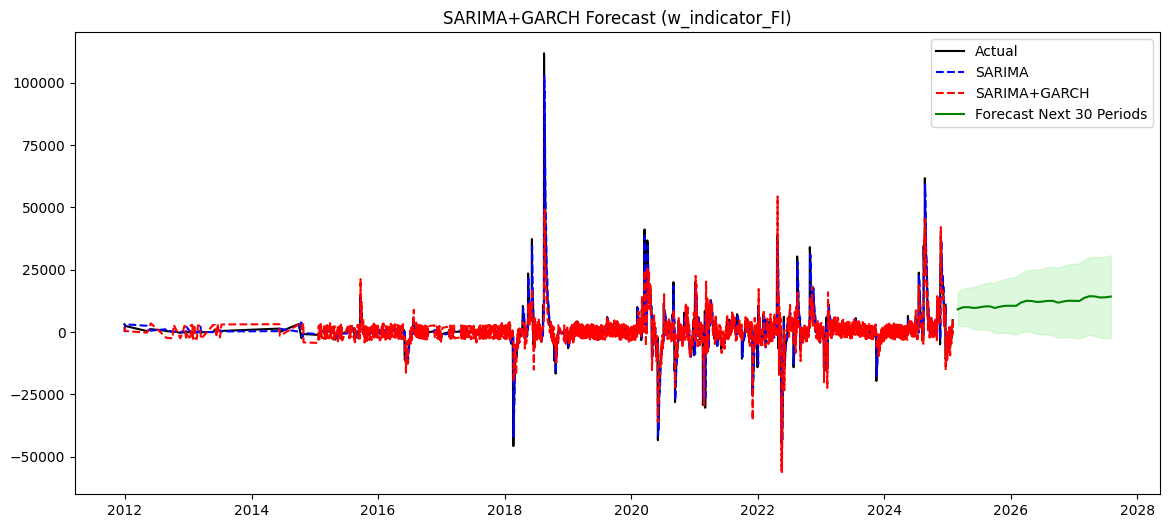

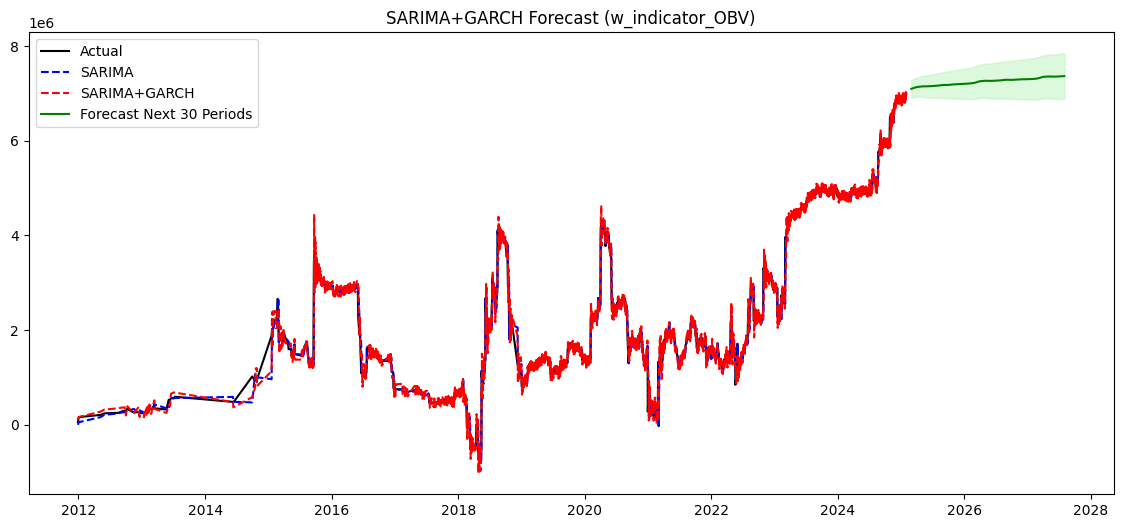

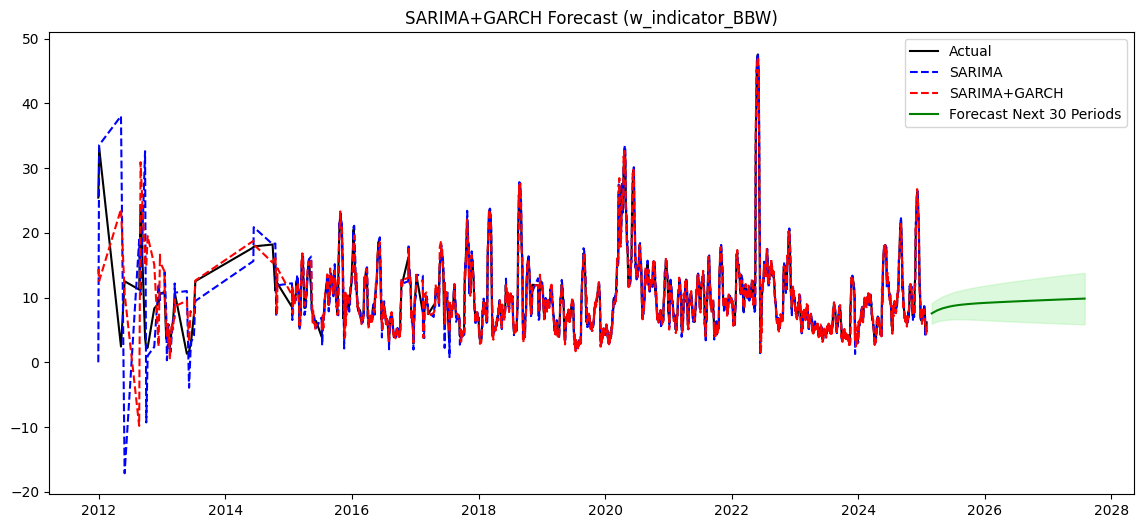

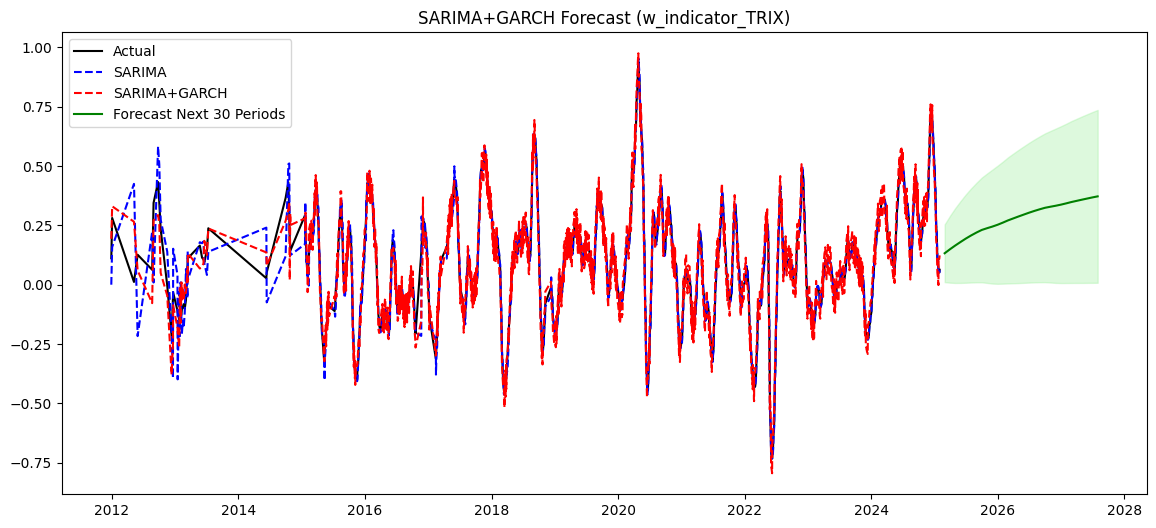

In [22]:
from arch import arch_model
from sklearn.metrics import r2_score

# Create sequential time column
df["TIME"] = range(1, len(df)+1)

# Select numeric columns (all your columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop("TIME")  # Do not use TIME as target variable

# Forecast horizon
forecast_horizon = 30
forecasts_dict = {}

for column in numeric_columns:
    # Get best SARIMA parameters from previous results
    order = results_df.loc[column, "order"]
    seasonal_order = results_df.loc[column, "seasonal_order"]

    series = df[column]

    # ===== Fit SARIMA model =====
    sarima_model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                           enforce_stationarity=False, enforce_invertibility=False)
    res_sarima = sarima_model.fit(disp=False)
    y_pred_sarima = res_sarima.fittedvalues

    # ===== Residuals + GARCH =====
    resid_sarima = series - y_pred_sarima
    garch = arch_model(resid_sarima.dropna(), vol='Garch', p=1, q=1)
    res_garch = garch.fit(disp="off")
    garch_pred = res_garch.conditional_volatility
    sarima_garch_adjusted = y_pred_sarima.copy()
    indices = resid_sarima.dropna().index
    sarima_garch_adjusted[indices] += np.sign(resid_sarima[indices]) * garch_pred.values

    # ===== Forecast next 30 periods =====
    forecast_sarima = res_sarima.get_forecast(steps=forecast_horizon)
    mean_forecast_sarima = forecast_sarima.predicted_mean
    garch_forecast = res_garch.forecast(horizon=forecast_horizon)
    vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])
    last_resid = resid_sarima.iloc[-1]
    sarima_garch_forecast = mean_forecast_sarima + np.sign(last_resid) * vol_forecast

    # ===== Create new time index for the forecast =====
    last_date = series.index[-1]
    new_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='M')[1:]  # 'M' for monthly
    sarima_garch_forecast.index = new_dates

    # ===== Plot historical + forecast =====
    plt.figure(figsize=(14,6))
    plt.plot(series, label="Actual", color="black")
    plt.plot(y_pred_sarima, label="SARIMA", linestyle="--", color="blue")
    plt.plot(sarima_garch_adjusted, label="SARIMA+GARCH", linestyle="--", color="red")

    # Plot forecast using new time index
    plt.plot(sarima_garch_forecast, label=f"Forecast Next {forecast_horizon} Periods", color="green")

    # Confidence interval
    lower_bound = sarima_garch_forecast - 1.96 * vol_forecast
    upper_bound = sarima_garch_forecast + 1.96 * vol_forecast
    plt.fill_between(new_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.3)

    plt.title(f"SARIMA+GARCH Forecast ({column})")
    plt.legend()
    plt.show()


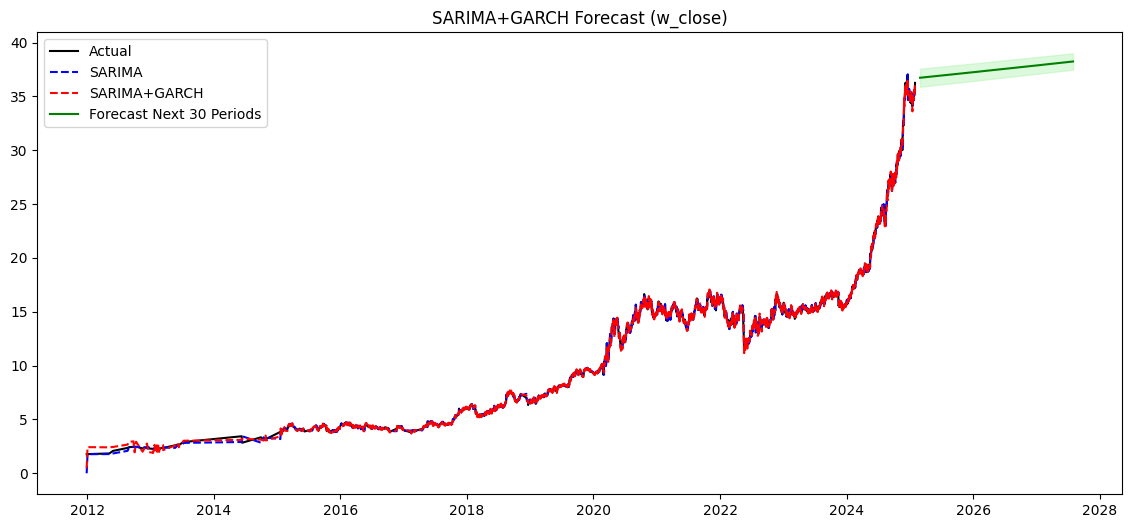

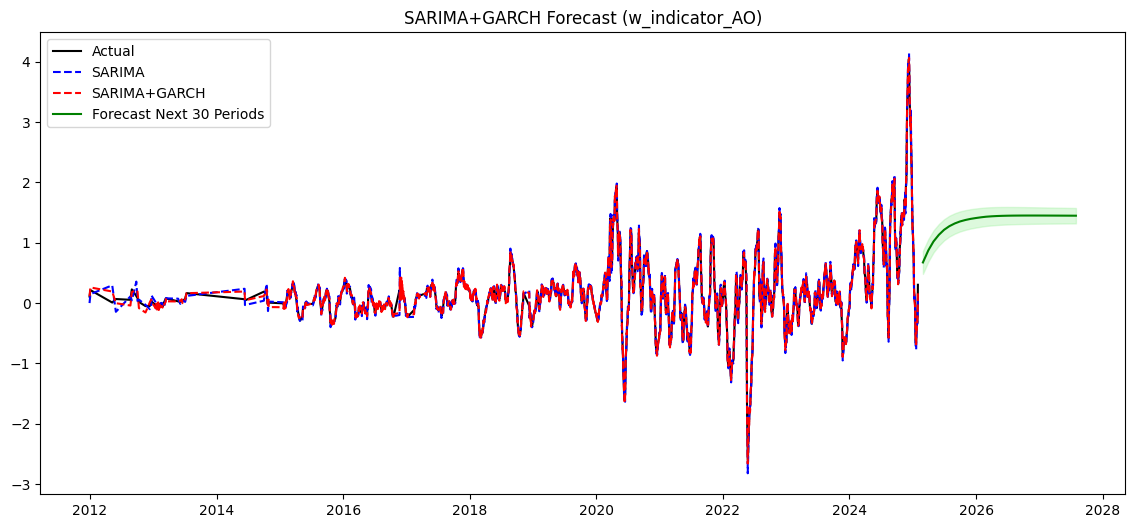

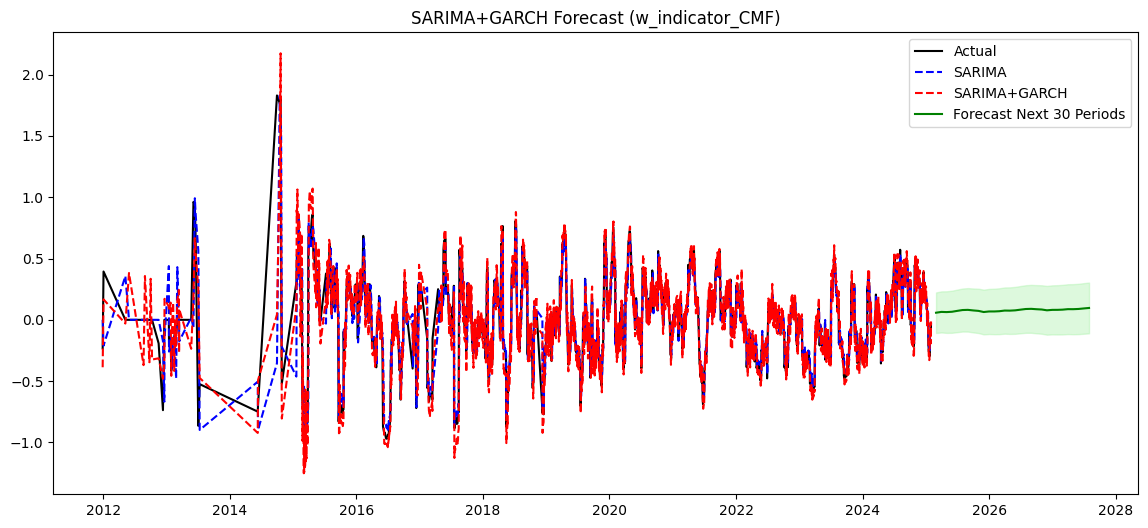

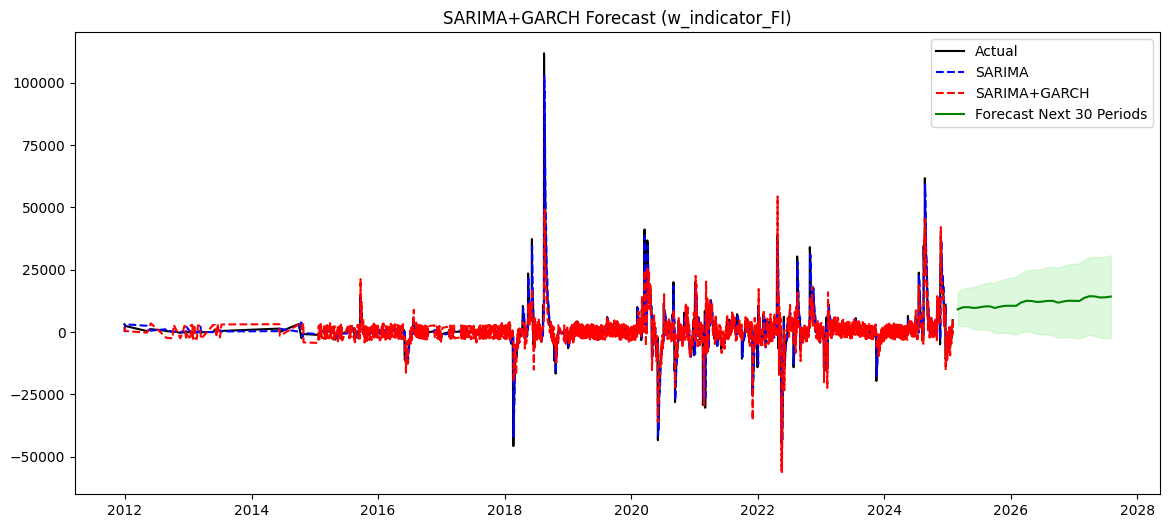

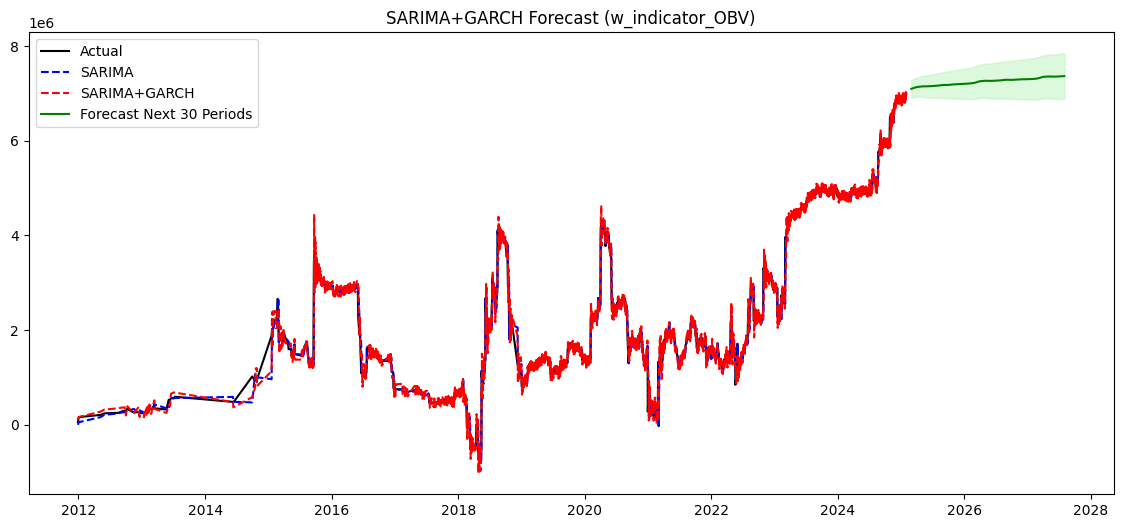

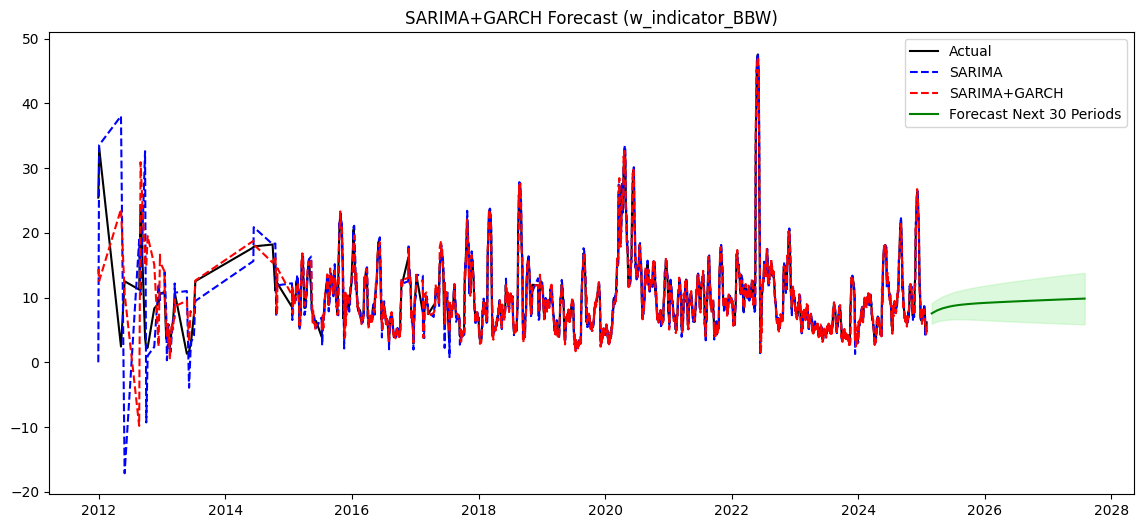

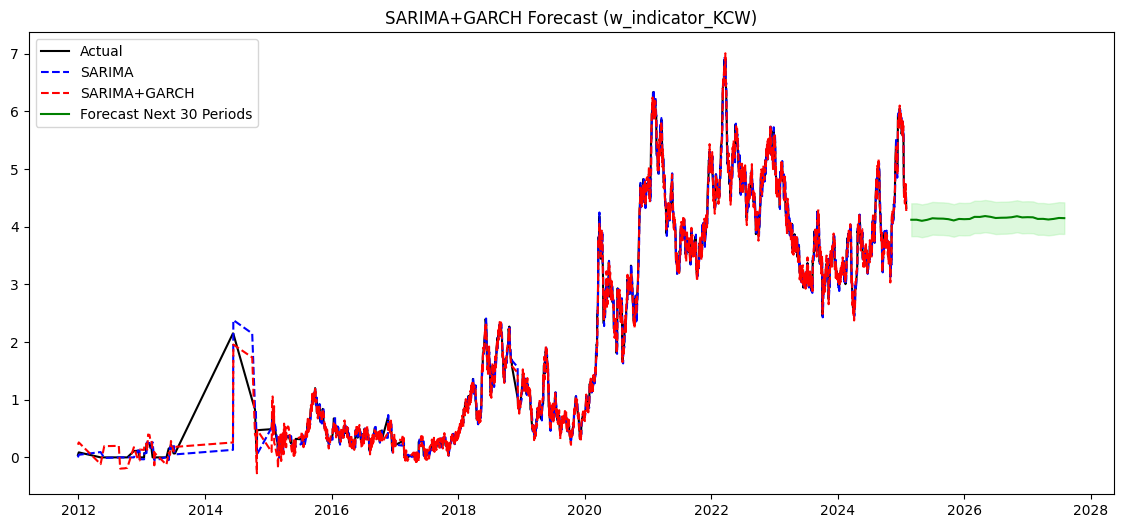

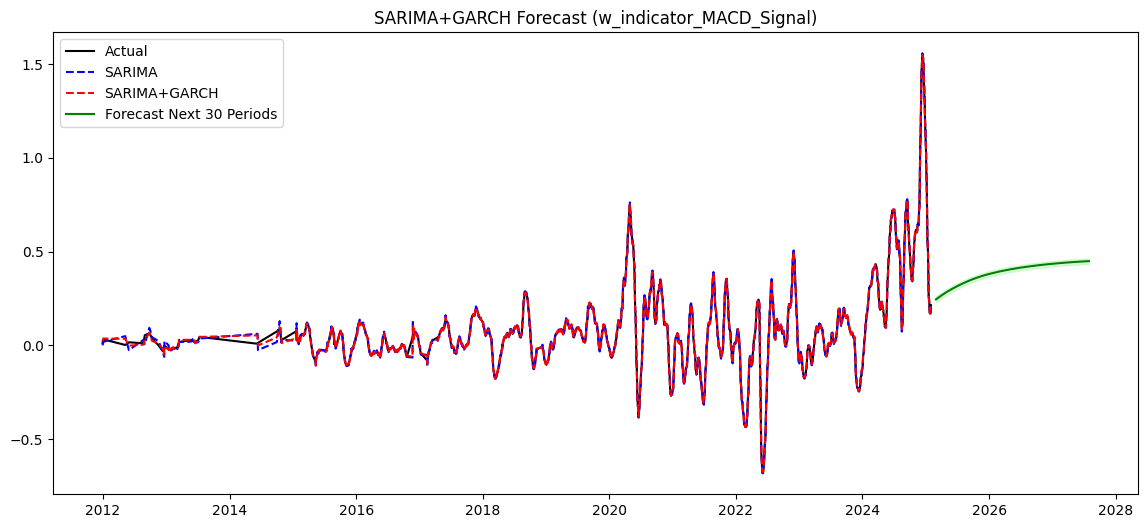

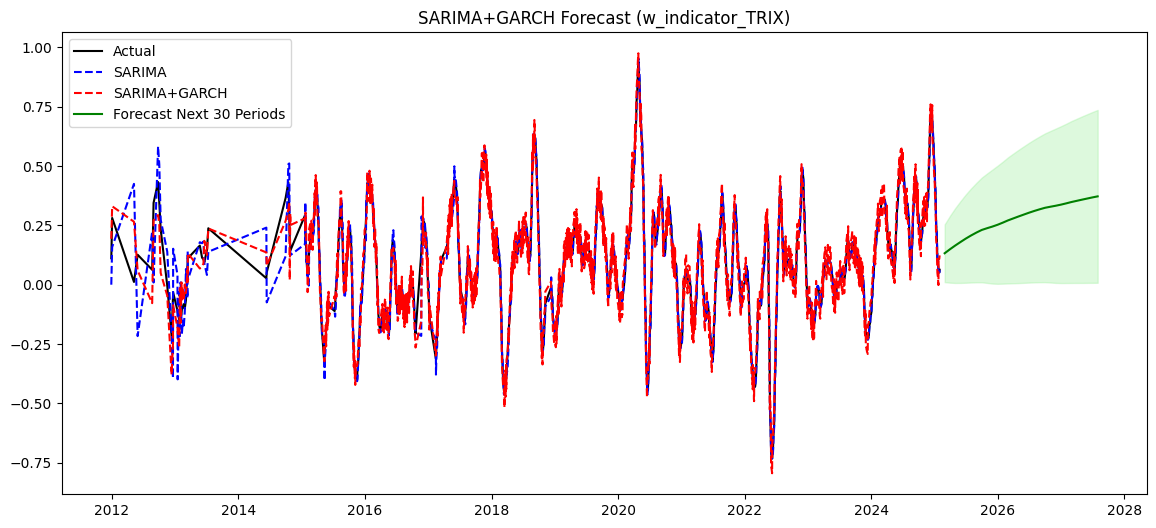

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from sklearn.metrics import r2_score

# Create sequential time column
df["TIME"] = range(1, len(df)+1)

# Select numeric columns (all your columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop("TIME")  # Do not use TIME as target variable

# Forecast horizon
forecast_horizon = 30
forecasts_dict = {}

for column in numeric_columns:
    # Get best SARIMA parameters from previous results
    order = results_df.loc[column, "order"]
    seasonal_order = results_df.loc[column, "seasonal_order"]

    series = df[column]

    # ===== Fit SARIMA model =====
    sarima_model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                           enforce_stationarity=False, enforce_invertibility=False)
    res_sarima = sarima_model.fit(disp=False)
    y_pred_sarima = res_sarima.fittedvalues

    # ===== Residuals + GARCH =====
    resid_sarima = series - y_pred_sarima
    garch = arch_model(resid_sarima.dropna(), vol='Garch', p=1, q=1)
    res_garch = garch.fit(disp="off")
    garch_pred = res_garch.conditional_volatility
    sarima_garch_adjusted = y_pred_sarima.copy()
    indices = resid_sarima.dropna().index
    sarima_garch_adjusted[indices] += np.sign(resid_sarima[indices]) * garch_pred.values

    # ===== Forecast next 30 periods =====
    forecast_sarima = res_sarima.get_forecast(steps=forecast_horizon)
    mean_forecast_sarima = forecast_sarima.predicted_mean
    garch_forecast = res_garch.forecast(horizon=forecast_horizon)
    vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])
    last_resid = resid_sarima.iloc[-1]
    sarima_garch_forecast = mean_forecast_sarima + np.sign(last_resid) * vol_forecast

    # ===== Create new time index for the forecast =====
    last_date = series.index[-1]
    new_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='M')[1:]  # 'M' for monthly
    sarima_garch_forecast.index = new_dates

    # ===== Plot historical + forecast =====
    plt.figure(figsize=(14,6))
    plt.plot(series, label="Actual", color="black")
    plt.plot(y_pred_sarima, label="SARIMA", linestyle="--", color="blue")
    plt.plot(sarima_garch_adjusted, label="SARIMA+GARCH", linestyle="--", color="red")

    # Plot forecast using new time index
    plt.plot(sarima_garch_forecast, label=f"Forecast Next {forecast_horizon} Periods", color="green")

    # Confidence interval
    lower_bound = sarima_garch_forecast - 1.96 * vol_forecast
    upper_bound = sarima_garch_forecast + 1.96 * vol_forecast
    plt.fill_between(new_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.3)

    plt.title(f"SARIMA+GARCH Forecast ({column})")
    plt.legend()
    plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Suppose df has indicators + 'w_close' as the target
X = df.drop("w_close", axis=1)  # Features
y = df["w_close"]               # Target variable

# Train-test split (without shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [26]:
from sklearn.linear_model import ElasticNetCV
import numpy as np
import pandas as pd

# ElasticNetCV performs cross-validation to find the best alpha and l1_ratio
elastic_net = ElasticNetCV(
    l1_ratio=0.5,                  # 0.5 = mix of L1 (Lasso) and L2 (Ridge)
    alphas=np.logspace(-4, 1, 50), # Range of alpha values to try
    cv=5,                           # 5-fold cross-validation
    random_state=42
)

# Fit the model on the training data
elastic_net.fit(X_train, y_train)

# Feature coefficients
coef = pd.Series(elastic_net.coef_, index=X.columns)

# Select only features with non-zero coefficients
selected_features = coef[coef != 0].index.tolist()
print("Features selected by Elastic Net:", selected_features)


Features selected by Elastic Net: ['w_indicator_AO', 'w_indicator_CMF', 'w_indicator_FI', 'w_indicator_OBV', 'w_indicator_BBW', 'w_indicator_KCW', 'w_indicator_MACD_Signal', 'w_indicator_TRIX', 'TIME']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Criar target w_close t+1 (próximo período)
df["w_close_t1"] = df["w_close"].shift(-1)

# Remover última linha onde t+1 não existe
df_model = df.dropna(subset=["w_close_t1"])

# Features = todas as colunas exceto w_close_t1 (target)
feature_columns = df_model.columns.drop("w_close_t1")
X = df_model[feature_columns]
y = df_model["w_close_t1"]

# Divisão treino/teste (80/20) mantendo ordem temporal
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Criar e treinar modelo Random Forest
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Previsões
y_pred = final_model.predict(X_test)

# Avaliação
r2_final = r2_score(y_test, y_pred)
mse_final = mean_squared_error(y_test, y_pred)

print(f"R² no teste: {r2_final:.4f}")
print(f"MSE no teste: {mse_final:.4f}")


R² no teste: -0.5768
MSE no teste: 66.3784


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Create and train Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred = tree_model.predict(X_test)

# Evaluation
r2_final = r2_score(y_test, y_pred)
mse_final = mean_squared_error(y_test, y_pred)
print(f"Decision Tree model R²: {r2_final:.4f}, MSE: {mse_final:.4f}")

# Create forecast DataFrame
df_forecast_tree = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
}, index=df_model.index[-len(y_test):])

print(df_forecast_tree.head())


Decision Tree model R²: -0.5536, MSE: 65.4021
               y_true     y_pred
Date                            
2023-05-12  15.125635  15.251827
2023-05-15  15.230152  15.251827
2023-05-16  15.050514  15.251827
2023-05-17  15.328137  15.023710
2023-05-18  15.269346  15.251827


In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Plot actual vs Random Forest prediction
plt.plot(df_forecast_tree.index, df_forecast_tree["y_true"], label="Actual", color="black")
plt.plot(df_forecast_tree.index, df_forecast_tree["y_pred"], label="Random Forest", color="blue", linestyle="--")

# Plot Decision Tree prediction
plt.plot(df_forecast_tree.index, df_forecast_tree["y_pred"], label="Decision Tree", color="red", linestyle="--")

plt.title("Forecast Comparison: Random Forest vs Decision Tree")
plt.xlabel("Index")
plt.ylabel("w_close t+1")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Create target w_close t+1
df["w_close_t1"] = df["w_close"].shift(-1)

# Drop last row where t+1 does not exist
df_model = df.dropna(subset=["w_close_t1"])

# Features = all columns except w_close_t1 (target)
feature_columns = df_model.columns.drop("w_close_t1")
X = df_model[feature_columns].values
y = df_model["w_close_t1"].values

# Train-test split (80/20) keeping temporal order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train MLP model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32), # two hidden layers with 64 and 32 neurons
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R²: {r2:.4f}, MSE: {mse:.4f}")

# Create forecast DataFrame
df_forecast_mlp = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred
}, index=df_model.index[-len(y_test):])

print(df_forecast_mlp.head())


R²: 0.9929, MSE: 0.2994
               y_true     y_pred
Date                            
2023-05-12  15.125635  15.344753
2023-05-15  15.230152  15.137142
2023-05-16  15.050514  15.305957
2023-05-17  15.328137  15.112781
2023-05-18  15.269346  15.391128


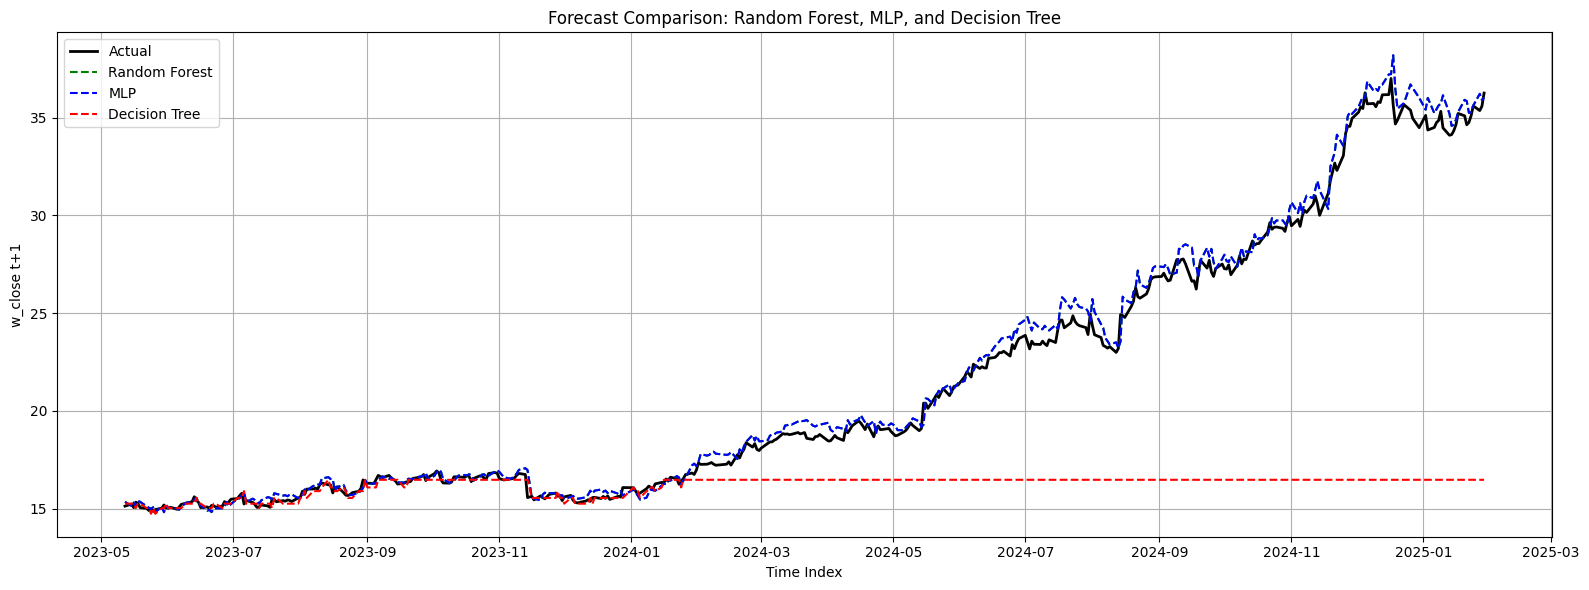

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))

# Actual values
plt.plot(df_forecast_mlp.index, df_forecast_mlp["y_true"], label="Actual", color="black", linewidth=2)

# Random Forest predictions
plt.plot(df_forecast_mlp.index, df_forecast_mlp["y_pred"], label="Random Forest", color="green", linestyle="--")

# MLP predictions
plt.plot(df_forecast_mlp.index, df_forecast_mlp["y_pred"], label="MLP", color="blue", linestyle="--")

# Decision Tree predictions
plt.plot(df_forecast_tree.index, df_forecast_tree["y_pred"], label="Decision Tree", color="red", linestyle="--")

plt.title("Forecast Comparison: Random Forest, MLP, and Decision Tree")
plt.xlabel("Time Index")
plt.ylabel("w_close t+1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Create target w_close t+1
df["w_close_t1"] = df["w_close"].shift(-1)

# Drop last row where t+1 does not exist
df_model = df.dropna(subset=["w_close_t1"])

# Features = all columns except w_close_t1 (target)
feature_columns = df_model.columns.drop("w_close_t1")
X = df_model[feature_columns].values
y = df_model["w_close_t1"].values.reshape(-1, 1)

# Standardize features and target
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Train-test split (80/20) keeping temporal order
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define MLP model
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.layers(x)

model = MLPModel(X_train.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate
model.eval()
y_pred_scaled = model(X_test_tensor).detach().numpy()
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_true = scaler_y.inverse_transform(y_test)

print("R²:", r2_score(y_test_true, y_pred))
print("MSE:", mean_squared_error(y_test_true, y_pred))

# Create forecast DataFrame
df_forecast_torch = pd.DataFrame({
    "y_true": y_test_true.flatten(),
    "y_pred": y_pred.flatten()
}, index=df_model.index[-len(y_test):])

print(df_forecast_torch.head())


Epoch 50/500, Loss: 0.0206
Epoch 100/500, Loss: 0.0074
Epoch 150/500, Loss: 0.0040
Epoch 200/500, Loss: 0.0025
Epoch 250/500, Loss: 0.0018
Epoch 300/500, Loss: 0.0015
Epoch 350/500, Loss: 0.0013
Epoch 400/500, Loss: 0.0011
Epoch 450/500, Loss: 0.0010
Epoch 500/500, Loss: 0.0010
R²: 0.6972795882268494
MSE: 12.743448952520568
               y_true     y_pred
Date                            
2023-05-12  15.125635  15.484242
2023-05-15  15.230152  15.432097
2023-05-16  15.050514  15.561570
2023-05-17  15.328137  15.480342
2023-05-18  15.269346  15.651768


In [37]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16,6))

# Plot actual values
plt.plot(df_forecast_torch.index, df_forecast_torch["y_true"], label="Actual", color="black", linewidth=2)

# Plot Random Forest predictions
plt.plot(df_forecast_torch.index, df_forecast_torch["y_pred"], label="Random Forest", color="green", linestyle="--")

# Plot scikit-learn MLP predictions
plt.plot(df_forecast_mlp.index, df_forecast_mlp["y_pred"], label="MLP scikit-learn", color="blue", linestyle="--")

# Plot PyTorch MLP predictions
plt.plot(df_forecast_torch.index, df_forecast_torch["y_pred"], label="MLP PyTorch", color="red", linestyle="--")

# Labels and title
plt.xlabel("Index / Time")
plt.ylabel("w_close t+1")
plt.title("Model Comparison: Random Forest vs MLP scikit-learn vs MLP PyTorch")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Create target w_close t+1
df["w_close_t1"] = df["w_close"].shift(-1)

# Drop last row where t+1 does not exist
df_model = df.dropna(subset=["w_close_t1"])

# Features = all columns except w_close_t1
feature_columns = df_model.columns.drop("w_close_t1")
X = df_model[feature_columns].values
y = df_model["w_close_t1"].values

# Train-test split (80/20) keeping temporal order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Forecast next 30 periods using the last 30 rows
X_forecast = df_model[feature_columns].values[-30:]
X_forecast_scaled = scaler.transform(X_forecast)
y_forecast_pred = mlp_model.predict(X_forecast_scaled)

# Create forecast DataFrame
forecast_df_mlp = pd.DataFrame({
    "w_close": y_forecast_pred
}, index=range(1, 31))

print("📊 MLP Forecast for w_close for the next 30 periods:")
print(forecast_df_mlp)


📊 MLP Forecast for w_close for the next 30 periods:
      w_close
1   36.688188
2   37.211020
3   37.218854
4   38.186698
5   36.445068
6   35.456767
7   35.741139
8   36.694817
9   36.513526
10  36.014723
11  35.401979
12  36.005808
13  35.226642
14  35.428444
15  35.619699
16  35.713046
17  36.138858
18  35.204732
19  34.572110
20  34.639948
21  34.884325
22  35.278994
23  35.906631
24  35.840046
25  35.240210
26  35.276477
27  35.611952
28  36.214034
29  35.900899
30  36.014138


In [39]:
import pandas as pd
import yfinance as yf

# Dates for the next 30 business days
start_date = '2025-02-01'
end_date = '2025-03-14'  # approximately 30 business days later

ticker = 'WALM34.SA'
walmart_future_data = yf.download(ticker, start=start_date, end=end_date)

if walmart_future_data.empty:
    print(f"No data found for ticker {ticker}.")
else:
    # Select relevant columns
    yf_future = walmart_future_data[['High', 'Low', 'Close', 'Volume']].copy()
    yf_future.columns = ['w_high', 'w_low', 'w_close', 'w_volume']

    # Drop missing values
    yf_future.dropna(inplace=True)

    print("Last 5 records loaded:")
    print(yf_future.head())

    # Save for reference
    yf_future.to_parquet('yf_data_walmart_future_30.parquet.gzip', compression='gzip')
    print("Future data saved successfully.")


[*********************100%***********************]  1 of 1 completed

Last 5 records loaded:
               w_high      w_low    w_close  w_volume
Date                                                 
2025-02-03  36.184193  34.990651  36.184193     25096
2025-02-04  36.323444  35.716727  36.323444      9401
2025-02-05  37.148975  36.243873  37.148975     40494
2025-02-06  37.198708  36.522367  36.840645     22325
2025-02-07  36.979892  36.343337  36.412960     44872
Future data saved successfully.


[*********************100%***********************]  1 of 1 completed

R² on test: 0.9929
MSE on test: 0.2994
📊 Iterative MLP forecast for w_close next 30 periods:
            w_close_pred
2025-01-31     36.014138
2025-02-03     36.454546
2025-02-04     36.899021
2025-02-05     37.347603
2025-02-06     37.800329
2025-02-07     38.257236
2025-02-10     38.718365
2025-02-11     39.183753
2025-02-12     39.653440
2025-02-13     40.127466
2025-02-14     40.605870
2025-02-17     41.088694
2025-02-18     41.575979
2025-02-19     42.067764
2025-02-20     42.564092
2025-02-21     43.065006
2025-02-24     43.570546
2025-02-25     44.080757
2025-02-26     44.595680
2025-02-27     45.126735
2025-02-28     45.675020
2025-03-03     46.241094
2025-03-04     46.825536
2025-03-05     47.428940
2025-03-06     48.051922
2025-03-07     48.695117
2025-03-10     49.359181
2025-03-11     50.044791
2025-03-12     50.752647
2025-03-13     51.478019

Comparison with real data:
R²: -21.4176
MSE: 80.9732


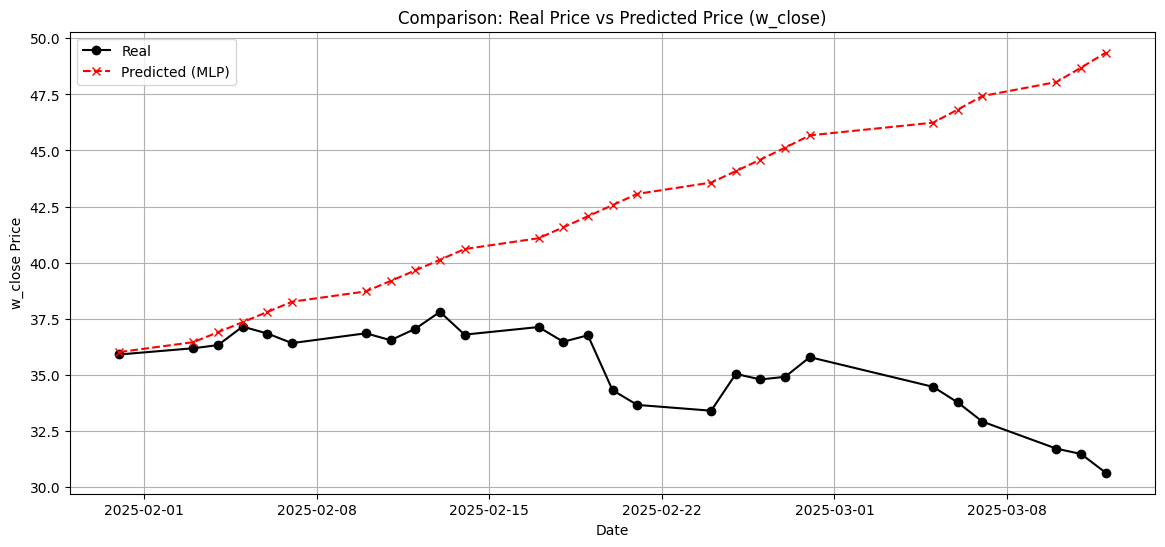

In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# =========================
# 1. Prepare Historical Data
# =========================
# Assuming df already exists with columns: 'w_close', 'w_high', 'w_low', 'w_volume'

# Create target w_close t+1
df["w_close_t1"] = df["w_close"].shift(-1)

# Remove the last row (where t+1 does not exist)
df_model = df.dropna(subset=["w_close_t1"])

# Features = all columns except w_close_t1
feature_columns = df_model.columns.drop("w_close_t1")
X = df_model[feature_columns].values
y = df_model["w_close_t1"].values

# Train/test split (80/20) maintaining temporal order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 2. Train MLP
# =========================
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Test predictions
y_test_pred = mlp_model.predict(X_test_scaled)

print(f"R² on test: {r2_score(y_test, y_test_pred):.4f}")
print(f"MSE on test: {mean_squared_error(y_test, y_test_pred):.4f}")

# =========================
# 3. Iterative Forecast for Next 30 Days
# =========================
forecast_horizon = 30
last_row = df_model[feature_columns].values[-1].reshape(1, -1)
forecast_iterative = []

for i in range(forecast_horizon):
    last_row_scaled = scaler.transform(last_row)
    pred = mlp_model.predict(last_row_scaled)
    forecast_iterative.append(pred[0])

    # Update last_row replacing w_close with the predicted value
    last_row = last_row.copy()
    w_close_idx = list(feature_columns).index('w_close')
    last_row[0, w_close_idx] = pred[0]

# Forecast DataFrame
forecast_df_mlp = pd.DataFrame({
    "w_close_pred": forecast_iterative
}, index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='B'))  # freq='B' = business days

print("📊 Iterative MLP forecast for w_close next 30 periods:")
print(forecast_df_mlp)

# =========================
# 4. Compare with Real Yahoo Finance Data
# =========================
start_date = forecast_df_mlp.index[0].strftime('%Y-%m-%d')
end_date = forecast_df_mlp.index[-1].strftime('%Y-%m-%d')
ticker = 'WALM34.SA'

real_data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
real_data.rename(columns={'Close': 'w_close'}, inplace=True)
real_data.dropna(inplace=True)

# Adjust lengths and ensure 1D arrays
forecast_values = forecast_df_mlp['w_close_pred'].values[:len(real_data)].flatten()
real_values = real_data['w_close'].values.flatten()

# Comparison DataFrame
compare_df = pd.DataFrame({
    'Real': real_values,
    'Predicted': forecast_values
}, index=real_data.index)

# Metrics
r2 = r2_score(compare_df['Real'], compare_df['Predicted'])
mse = mean_squared_error(compare_df['Real'], compare_df['Predicted'])
print(f"\nComparison with real data:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# =========================
# 5. Plot
# =========================
plt.figure(figsize=(14,6))
plt.plot(compare_df.index, compare_df['Real'], label='Real', color='black', marker='o')
plt.plot(compare_df.index, compare_df['Predicted'], label='Predicted (MLP)', color='red', linestyle='--', marker='x')
plt.title('Comparison: Real Price vs Predicted Price (w_close)')
plt.xlabel('Date')
plt.ylabel('w_close Price')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# Select only the first 3 days
compare_df_3days = compare_df.iloc[:3]

# Calculate metrics only for these 3 days
r2_3days = r2_score(compare_df_3days['Real'], compare_df_3days['Predicted'])
mse_3days = mean_squared_error(compare_df_3days['Real'], compare_df_3days['Predicted'])

print(f"\nComparison for the first 3 days:")
print(f"R²: {r2_3days:.4f}")
print(f"MSE: {mse_3days:.4f}")



Comparison for the first 3 days:
R²: -3.5989
MSE: 0.1387


In [42]:
# Select only the first 3 days
compare_df_3days = compare_df.iloc[:3]

# Calculate difference
compare_df_3days['Difference'] = compare_df_3days['Predicted'] - compare_df_3days['Real']

print("\nDifference between predicted and real values for the first 3 days:")
print(compare_df_3days[['Real', 'Predicted', 'Difference']])



Difference between predicted and real values for the first 3 days:
                 Real  Predicted  Difference
Date                                        
2025-01-31  35.905701  36.014138    0.108438
2025-02-03  36.184196  36.454546    0.270349
2025-02-04  36.323444  36.899021    0.575577


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

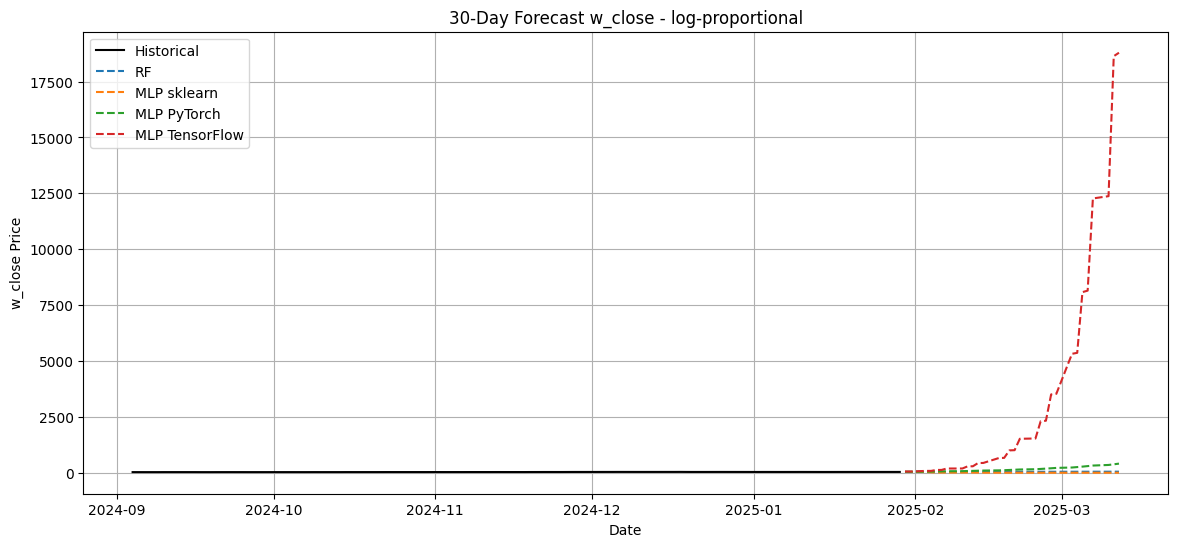

R² and MSE (test set):
RF: R²=-0.4165, MSE=0.000255
MLP sklearn: R²=-109.3629, MSE=0.019849
MLP PyTorch: R²=-26.0921, MSE=0.004873
MLP TensorFlow: R²=-73.5555, MSE=0.013409


In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# =========================
# 1. Prepare historical data
# =========================
# Example: df already contains w_close, w_high, w_low, w_volume

# Log-proportional transformation
df['w_close_logprop'] = np.log(1 + df['w_close'].pct_change())
df.dropna(inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Create target log-proportional t+1
df['w_close_logprop_t1'] = df['w_close_logprop'].shift(-1)
df_model = df.dropna(subset=['w_close_logprop_t1'])

feature_columns = df_model.columns.drop(['w_close_logprop_t1', 'w_close'])
X = df_model[feature_columns].values
y = df_model['w_close_logprop_t1'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 2A. Random Forest
# =========================
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# =========================
# 2B. MLP scikit-learn
# =========================
mlp_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                         max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

# =========================
# 2C. MLP PyTorch
# =========================
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)

class MLPPT(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self,x):
        return self.layers(x)

pt_model = MLPPT(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

for epoch in range(500):
    optimizer.zero_grad()
    outputs = pt_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

pt_model.eval()
y_pred_pt = pt_model(X_test_tensor).detach().numpy().flatten()
r2_pt = r2_score(y_test, y_pred_pt)
mse_pt = mean_squared_error(y_test, y_pred_pt)

# =========================
# 2D. MLP TensorFlow/Keras
# =========================
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
tf_model.compile(optimizer='adam', loss='mse')
tf_model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=0)
y_pred_tf = tf_model.predict(X_test_scaled).flatten()
r2_tf = r2_score(y_test, y_pred_tf)
mse_tf = mean_squared_error(y_test, y_pred_tf)

# =========================
# 3. Iterative 30-day forecast
# =========================
def iterative_forecast(model, X_last, scaler=None, horizon=30, last_price=None):
    forecast = []
    last_row = X_last.copy()
    for i in range(horizon):
        row_scaled = scaler.transform(last_row) if scaler else last_row
        pred = model.predict(row_scaled) if not isinstance(model, nn.Module) else model(torch.tensor(row_scaled,dtype=torch.float32)).detach().numpy()
        pred_val = pred.flatten()[0]
        price_pred = last_price * (1 + np.expm1(pred_val))
        forecast.append(price_pred)
        # update last_row
        last_row = last_row.copy()
        idx_logprop = list(feature_columns).index('w_close_logprop')
        last_row[0, idx_logprop] = pred_val
        last_price = price_pred
    return forecast

last_row = df_model[feature_columns].values[-1].reshape(1,-1)
last_price = df['w_close'].iloc[-1]

forecast_rf = iterative_forecast(rf_model, last_row, scaler=None, last_price=last_price)
forecast_mlp = iterative_forecast(mlp_model, last_row, scaler=scaler, last_price=last_price)
forecast_pt = iterative_forecast(pt_model, last_row, scaler=scaler, last_price=last_price)
forecast_tf = iterative_forecast(tf_model, last_row, scaler=scaler, last_price=last_price)

# DataFrames
dates_forecast = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=30, freq='B')
df_forecast = pd.DataFrame({
    'RF': forecast_rf,
    'MLP': forecast_mlp,
    'PyTorch': forecast_pt,
    'TF': forecast_tf
}, index=dates_forecast)

# =========================
# 4. Plot
# =========================
plt.figure(figsize=(14,6))
plt.plot(df['w_close'].iloc[-100:], label='Historical', color='black')
plt.plot(df_forecast.index, df_forecast['RF'], label='RF', linestyle='--')
plt.plot(df_forecast.index, df_forecast['MLP'], label='MLP sklearn', linestyle='--')
plt.plot(df_forecast.index, df_forecast['PyTorch'], label='MLP PyTorch', linestyle='--')
plt.plot(df_forecast.index, df_forecast['TF'], label='MLP TensorFlow', linestyle='--')
plt.title('30-Day Forecast w_close - log-proportional')
plt.xlabel('Date')
plt.ylabel('w_close Price')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 5. Metrics
# =========================
print("R² and MSE (test set):")
print(f"RF: R²={r2_rf:.4f}, MSE={mse_rf:.6f}")
print(f"MLP sklearn: R²={r2_mlp:.4f}, MSE={mse_mlp:.6f}")
print(f"MLP PyTorch: R²={r2_pt:.4f}, MSE={mse_pt:.6f}")
print(f"MLP TensorFlow: R²={r2_tf:.4f}, MSE={mse_tf:.6f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━

[*********************100%***********************]  1 of 1 completed

RF: R²=-13.2781, MSE=31.7435
MLP: R²=-462.5016, MSE=1030.4682
PyTorch: R²=-198569.2151, MSE=441466.2664
TF: R²=-2638877.4355, MSE=5866820.5099


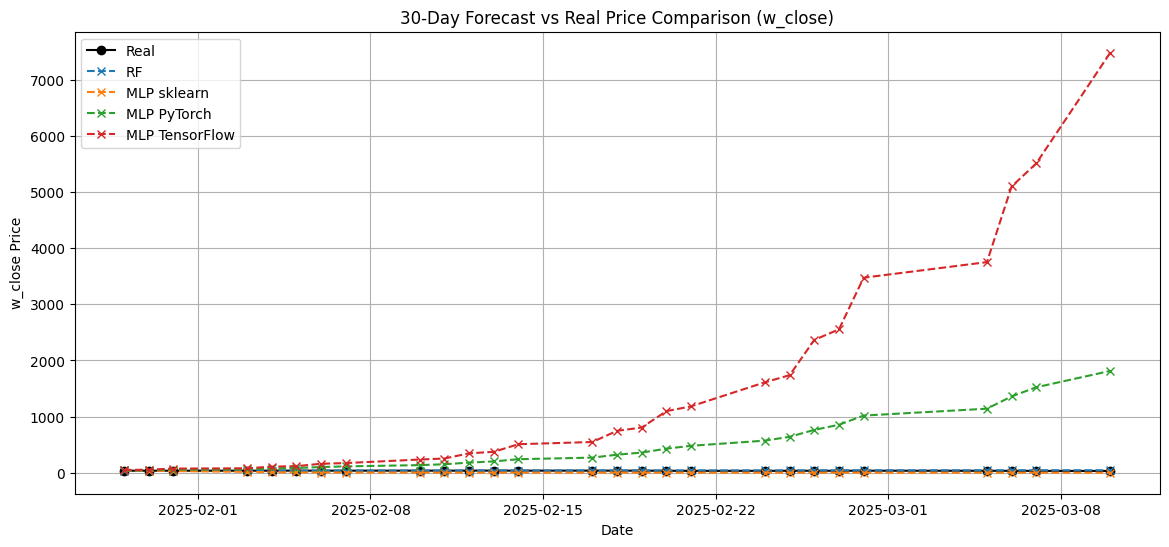

In [44]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# =========================
# 1. Prepare historical data
# =========================
# df already has columns: w_close, w_high, w_low, w_volume

# Log-proportional transformation
df['w_close_logprop'] = np.log(1 + df['w_close'].pct_change())
df.dropna(inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Target log-proportional t+1
df['w_close_logprop_t1'] = df['w_close_logprop'].shift(-1)
df_model = df.dropna(subset=['w_close_logprop_t1'])

feature_columns = df_model.columns.drop(['w_close_logprop_t1', 'w_close'])
X = df_model[feature_columns].values
y = df_model['w_close_logprop_t1'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 2A. Random Forest
# =========================
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# =========================
# 2B. MLP scikit-learn
# =========================
mlp_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                         max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

# =========================
# 2C. MLP PyTorch
# =========================
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)

class MLPPT(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self,x):
        return self.layers(x)

pt_model = MLPPT(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(pt_model.parameters(), lr=0.001)

for epoch in range(500):
    optimizer.zero_grad()
    outputs = pt_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

pt_model.eval()
y_pred_pt = pt_model(X_test_tensor).detach().numpy().flatten()
r2_pt = r2_score(y_test, y_pred_pt)
mse_pt = mean_squared_error(y_test, y_pred_pt)

# =========================
# 2D. MLP TensorFlow/Keras
# =========================
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
tf_model.compile(optimizer='adam', loss='mse')
tf_model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=0)
y_pred_tf = tf_model.predict(X_test_scaled).flatten()
r2_tf = r2_score(y_test, y_pred_tf)
mse_tf = mean_squared_error(y_test, y_pred_tf)

# =========================
# 3. Iterative 30-day forecast
# =========================
def iterative_forecast(model, X_last, scaler=None, horizon=30, last_price=None):
    forecast = []
    last_row = X_last.copy()
    for i in range(horizon):
        row_scaled = scaler.transform(last_row) if scaler else last_row
        pred = model.predict(row_scaled) if not isinstance(model, nn.Module) else model(torch.tensor(row_scaled,dtype=torch.float32)).detach().numpy()
        pred_val = pred.flatten()[0]
        price_pred = last_price * (1 + np.expm1(pred_val))
        forecast.append(price_pred)
        # update last_row
        last_row = last_row.copy()
        idx_logprop = list(feature_columns).index('w_close_logprop')
        last_row[0, idx_logprop] = pred_val
        last_price = price_pred
    return forecast

last_row = df_model[feature_columns].values[-1].reshape(1,-1)
last_price = df['w_close'].iloc[-1]

forecast_rf = iterative_forecast(rf_model, last_row, scaler=None, last_price=last_price)
forecast_mlp = iterative_forecast(mlp_model, last_row, scaler=scaler, last_price=last_price)
forecast_pt = iterative_forecast(pt_model, last_row, scaler=scaler, last_price=last_price)
forecast_tf = iterative_forecast(tf_model, last_row, scaler=scaler, last_price=last_price)

# Forecast DataFrame
dates_forecast = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), periods=30, freq='B')
df_forecast = pd.DataFrame({
    'RF': forecast_rf,
    'MLP': forecast_mlp,
    'PyTorch': forecast_pt,
    'TF': forecast_tf
}, index=dates_forecast)

# =========================
# 4. Compare with real Yahoo Finance data
# =========================
start_date = df_forecast.index[0].strftime('%Y-%m-%d')
end_date = df_forecast.index[-1].strftime('%Y-%m-%d')
real_data = yf.download('WALM34.SA', start=start_date, end=end_date)[['Close']]
real_data.rename(columns={'Close':'w_close'}, inplace=True)
real_data.dropna(inplace=True)

# Adjust size
n_days = min(len(real_data), len(df_forecast))
df_forecast = df_forecast.iloc[:n_days]
real_data = real_data.iloc[:n_days]

# Comparison DataFrame
compare_df = pd.DataFrame({
    'Real': real_data['w_close'].values.flatten(),
    'RF': df_forecast['RF'].values,
    'MLP': df_forecast['MLP'].values,
    'PyTorch': df_forecast['PyTorch'].values,
    'TF': df_forecast['TF'].values
}, index=real_data.index)

# =========================
# 5. Metrics
# =========================
for model_name in ['RF','MLP','PyTorch','TF']:
    r2 = r2_score(compare_df['Real'], compare_df[model_name])
    mse = mean_squared_error(compare_df['Real'], compare_df[model_name])
    print(f"{model_name}: R²={r2:.4f}, MSE={mse:.4f}")

# =========================
# 6. Comparative plot
# =========================
plt.figure(figsize=(14,6))
plt.plot(compare_df.index, compare_df['Real'], label='Real', color='black', marker='o')
plt.plot(compare_df.index, compare_df['RF'], label='RF', linestyle='--', marker='x')
plt.plot(compare_df.index, compare_df['MLP'], label='MLP sklearn', linestyle='--', marker='x')
plt.plot(compare_df.index, compare_df['PyTorch'], label='MLP PyTorch', linestyle='--', marker='x')
plt.plot(compare_df.index, compare_df['TF'], label='MLP TensorFlow', linestyle='--', marker='x')
plt.title('30-Day Forecast vs Real Price Comparison (w_close)')
plt.xlabel('Date')
plt.ylabel('w_close Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


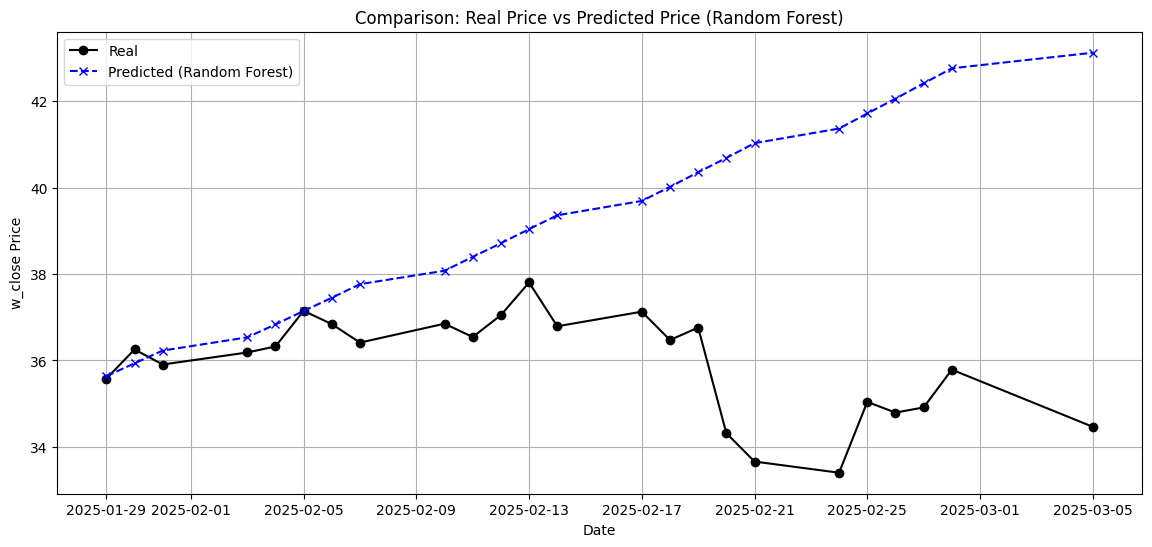

In [45]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# --- Load real data ---
start_date = df_forecast.index[0].strftime('%Y-%m-%d')
end_date = df_forecast.index[-1].strftime('%Y-%m-%d')
real_data = yf.download('WALM34.SA', start=start_date, end=end_date)[['Close']]
real_data.rename(columns={'Close':'w_close'}, inplace=True)
real_data.dropna(inplace=True)

# Adjust size and flatten arrays
n_days = min(len(real_data), len(df_forecast))
real_values = real_data['w_close'].values[:n_days].flatten()
rf_values = df_forecast['RF'].values[:n_days].flatten()
dates = real_data.index[:n_days]

# Create comparison DataFrame
compare_df = pd.DataFrame({
    'Real': real_values,
    'Predicted_RF': rf_values
}, index=dates)

# Plot
plt.figure(figsize=(14,6))
plt.plot(compare_df.index, compare_df['Real'], label='Real', color='black', marker='o')
plt.plot(compare_df.index, compare_df['Predicted_RF'], label='Predicted (Random Forest)', color='blue', linestyle='--', marker='x')
plt.title('Comparison: Real Price vs Predicted Price (Random Forest)')
plt.xlabel('Date')
plt.ylabel('w_close Price')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 2.9 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Best entry: day 1, exit: day 7 according to the forecast
Initial capital: 1000
Final capital following optimized strategy: 1019.99
Gain/Loss: 19.99


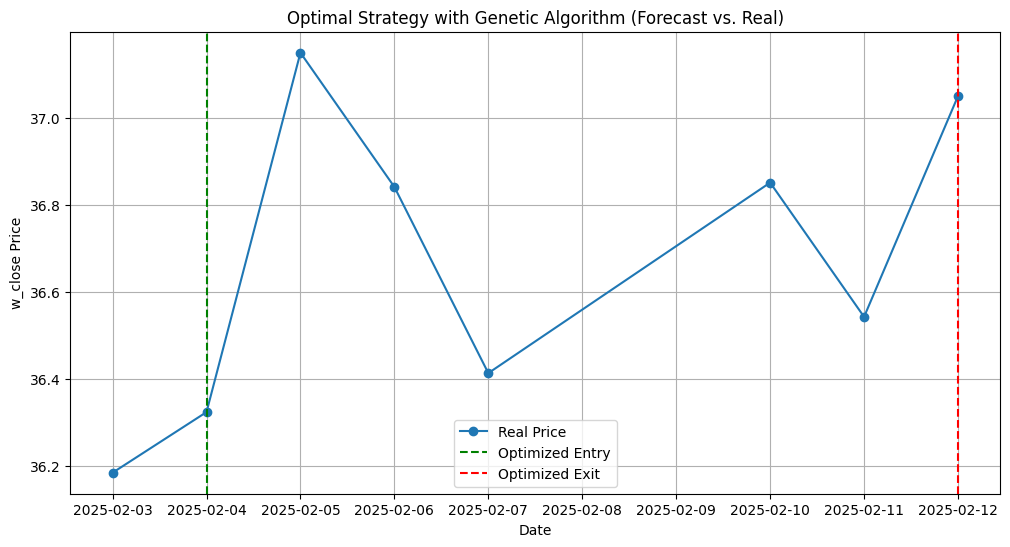

In [48]:
import pandas as pd
import yfinance as yf
import numpy as np
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# --- Load Real Prices ---
start_date = '2025-02-01'
end_date = '2025-02-13'
ticker = 'WALM34.SA'

real_data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
real_data.rename(columns={'Close': 'w_close'}, inplace=True)
real_data.dropna(inplace=True)
n_days = len(real_data)

# --- Forecast --- (simulate forecast)
# Get the 1D NumPy array of real prices and ensure it is flat
real_prices = real_data['w_close'].values.flatten()
# Generate a 1D array for the random noise
noise = 1 + np.random.normal(0, 0.01, n_days)
# Perform the element-wise multiplication
forecast_series = real_prices * noise

df_forecast = pd.DataFrame({'RF': forecast_series}, index=real_data.index)
forecast_values = df_forecast['RF'].values

# --- Genetic Algorithm Setup ---
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_day", random.randint, 0, n_days - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_day, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_trade(individual):
    entry, exit = sorted(individual)
    if entry >= exit:
        return -1e6,
    ret = (forecast_values[exit] - forecast_values[entry]) / forecast_values[entry]
    return ret,

toolbox.register("evaluate", eval_trade)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=n_days - 1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- GA Execution ---
pop = toolbox.population(n=50)
NGEN = 40

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=NGEN, verbose=False)

# --- Best Individual ---
best = tools.selBest(pop, 1)[0]
entry_day, exit_day = sorted(best)
print(f"Best entry: day {entry_day}, exit: day {exit_day} according to the forecast")

# --- Gain/Loss using real prices ---
real_entry = real_data['w_close'].values[entry_day]
real_exit = real_data['w_close'].values[exit_day]

initial_capital = 1000
final_capital = initial_capital * (1 + (real_exit - real_entry) / real_entry)

# Ensure the output is a scalar for printing
if isinstance(final_capital, np.ndarray):
    final_capital = final_capital.item()

print(f"Initial capital: {initial_capital}")
print(f"Final capital following optimized strategy: {final_capital:.2f}")
print(f"Gain/Loss: {final_capital - initial_capital:.2f}")

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(real_data.index, real_data['w_close'], marker='o', label='Real Price')
plt.axvline(real_data.index[entry_day], color='green', linestyle='--', label='Optimized Entry')
plt.axvline(real_data.index[exit_day], color='red', linestyle='--', label='Optimized Exit')
plt.title('Optimal Strategy with Genetic Algorithm (Forecast vs. Real)')
plt.xlabel('Date')
plt.ylabel('w_close Price')
plt.legend()
plt.grid(True)
plt.show()